# Project Regression Logistique


### Import

In [33]:
#pip install pandas pyreadstat scikit-learn matplotlib seaborn numpy scipy sas7bdat imbalanced-learn mlxtend statsmodels

In [34]:
import pandas as pd
import pyreadstat
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from sas7bdat import SAS7BDAT

In [35]:
# lecture du df
file_path = r'C:/Users/ingemedia/Desktop/ETUDES/DU Sorbonne/Cours Statistique/Projet/Données/individus_ct2013.sas7bdat'
df, meta = pyreadstat.read_sas7bdat(file_path)

In [36]:
# Exporter en csv pour mieux voir les variables et choisir lesquel on garde
csv_output_path = r'C:/Users/ingemedia/Desktop/ETUDES/DU Sorbonne/Cours Statistique/Projet/Données/individus_ct2013.csv'
df.to_csv(csv_output_path, index=False)


### Construction du jeu de données

In [37]:
# Filtrer les individus vivant en couple dans le même logement
df = df[df['COUPLE'] == "1"]
   
# On construit la variable binaire 
df['Y'] = df.apply(lambda row: 1 if (row['SEXE'] == '2') & (row['PRACT'] == '1') else 0, axis=1)


In [38]:
##Garder les variables importante a la main : 
colonne = [
    'IDENT_MEN', 'IDENT_IND', 'NPERS', 'NACTIFS', 'TYPMEN5', 'REVMEN',
    'CJSITUA', 'CJACTOCCUP', 'SEXE', 'AGE', 'COUPLE', 'COUPLRP', 'CONJOINT',
    'ETAMATRI', 'ENFANT', 'IPROPLOC', 'PRACT', 'LIENPREF', 'SITUA',
    'RABS', 'NBENFM3', 'NBENF3A17', 'NBENF18P', 'TOTREVEN', 'ITOTREV', 'EREG',
    'FRANCE', 'TPP', 'HH', 'ACTIP', 'STATUTP', 'ACTIM', 'STATUTM',
    'ETUDIPL', 'STATUTEXT', 'STATUT', 'CLASSIF', 'TYPEMPLOI', 'FONCTION',
    'ETUDES', 'DIPLOME', 'NATIO', 'AGFINETU', 'NBSALENTC', 'IDENT_LOG',
    'pondcal', 'naf17', 'naf4', 'region', 'anciennete', 'naf38', 'nati', "Y"
]

# Sélection des colonnes
selected_df = df[colonne]

types_de_donnees = selected_df.dtypes
print(types_de_donnees)
selected_df.shape

IDENT_MEN      object
IDENT_IND      object
NPERS         float64
NACTIFS       float64
TYPMEN5        object
REVMEN        float64
CJSITUA        object
CJACTOCCUP    float64
SEXE           object
AGE           float64
COUPLE         object
COUPLRP        object
CONJOINT       object
ETAMATRI       object
ENFANT         object
IPROPLOC       object
PRACT          object
LIENPREF       object
SITUA          object
RABS           object
NBENFM3       float64
NBENF3A17     float64
NBENF18P      float64
TOTREVEN      float64
ITOTREV        object
EREG           object
FRANCE         object
TPP            object
HH            float64
ACTIP          object
STATUTP        object
ACTIM          object
STATUTM        object
ETUDIPL        object
STATUTEXT      object
STATUT         object
CLASSIF        object
TYPEMPLOI      object
FONCTION       object
ETUDES         object
DIPLOME        object
NATIO          object
AGFINETU      float64
NBSALENTC      object
IDENT_LOG      object
pondcal   

(24024, 53)

### stat desc

In [39]:
# Listes des variables quantitatives et qualitatives
quanti_cols = ['NPERS', 'NACTIFS', 'REVMEN', 'AGE', 'NBENFM3', 'NBENF3A17', 'HH', 'AGFINETU', 'pondcal', 'anciennete']
quali_cols = ['TYPMEN5', 'CJSITUA', 'CJACTOCCUP', 'COUPLRP', 'CONJOINT', 'ETAMATRI', 'ENFANT', 'RABS','IPROPLOC', 'LIENPREF', 'SITUA', 'NBENF18P', 'ITOTREV', 'EREG', 'FRANCE', 'TPP', 'ACTIP', 'STATUTP', 'ACTIM', 'STATUTM', 'ETUDIPL', 'STATUTEXT', 'STATUT', 'CLASSIF', 'TYPEMPLOI', 'FONCTION', 'ETUDES', 'DIPLOME', 'NATIO', 'NBSALENTC', 'naf17', 'naf4', 'region', 'naf38', 'nati']

# Créer deux DataFrames, l'un pour les colonnes quantitatives et l'autre pour les colonnes qualitatives
df_quanti = selected_df[quanti_cols]
df_quali = selected_df[quali_cols]

print(df_quanti.dtypes)

NPERS         float64
NACTIFS       float64
REVMEN        float64
AGE           float64
NBENFM3       float64
NBENF3A17     float64
HH            float64
AGFINETU      float64
pondcal       float64
anciennete    float64
dtype: object


In [40]:
selected_df.describe()

,NPERS,NACTIFS,REVMEN,CJACTOCCUP,AGE,NBENFM3,NBENF3A17,NBENF18P,TOTREVEN,HH,AGFINETU,pondcal,anciennete,Y
count,24024.000000,24024.000000,22989.000000,24020.000000,24024.000000,24024.000000,24024.000000,24024.000000,17842.000000,23584.000000,23782.000000,24024.000000,23985.000000,24024.000000
mean,3.337829,1.956252,3821.640045,0.792381,43.817974,0.162338,0.908383,0.251374,3729.910380,37.298889,23.519469,790.641908,172.429977,0.211455
std,1.196510,0.523638,2724.325930,0.405611,10.094510,0.401931,1.046147,0.566038,2789.292148,11.715207,173.772250,1085.735807,132.976929,0.408349
min,0.000000,0.000000,100.000000,0.000000,17.000000,0.000000,0.000000,0.000000,100.000000,1.000000,-1951.000000,4.948079,0.000000,0.000000
25%,2.000000,2.000000,2600.000000,1.000000,36.000000,0.000000,0.000000,0.000000,2600.000000,35.000000,18.000000,263.337352,59.000000,0.000000
50%,3.000000,2.000000,3500.000000,1.000000,44.000000,0.000000,1.000000,0.000000,3300.000000,37.000000,20.000000,528.868676,144.000000,0.000000
75%,4.000000,2.000000,4500.000000,1.000000,52.000000,0.000000,2.000000,0.000000,4200.000000,40.000000,22.000000,864.091721,264.000000,0.000000
max,18.000000,7.000000,95000.000000,1.000000,131.000000,3.000000,8.000000,6.000000,95000.000000,168.000000,8048.000000,20381.895606,756.000000,1.000000


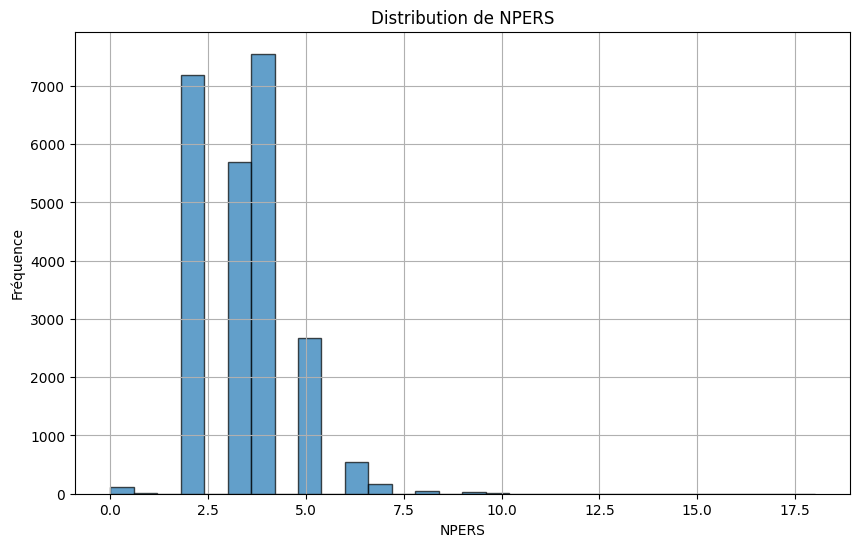

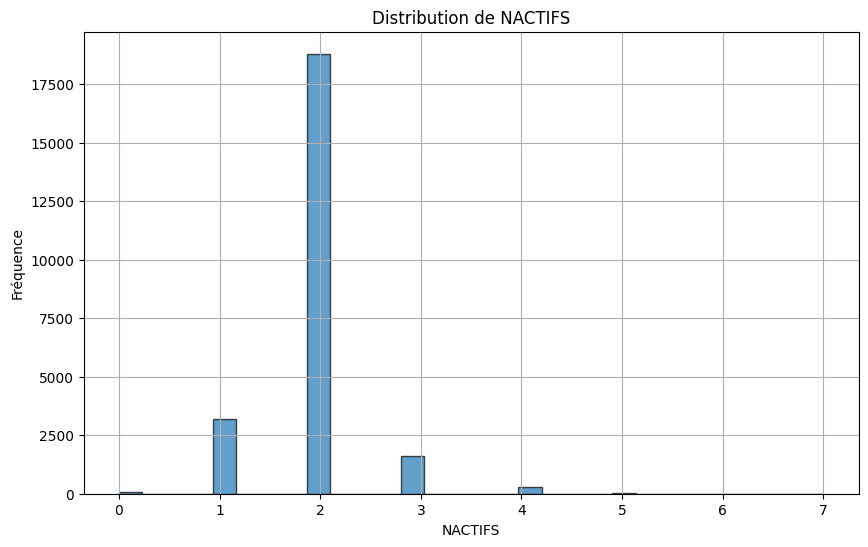

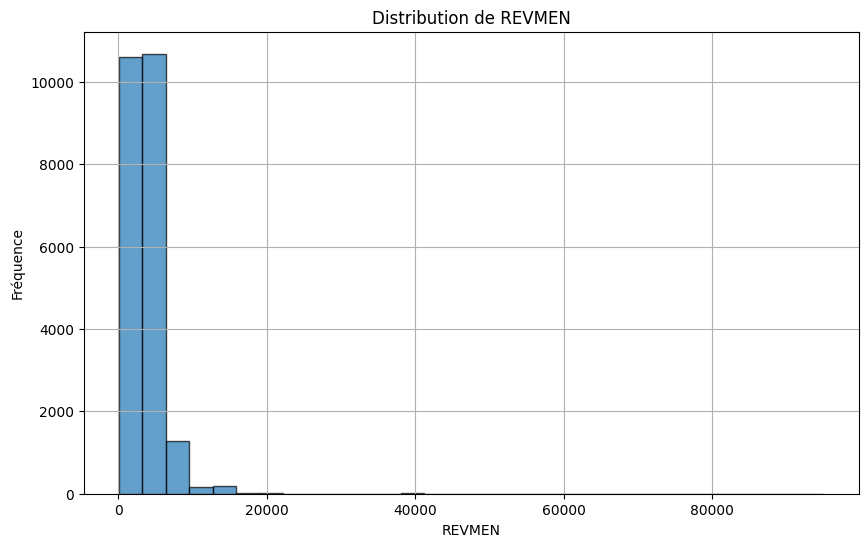

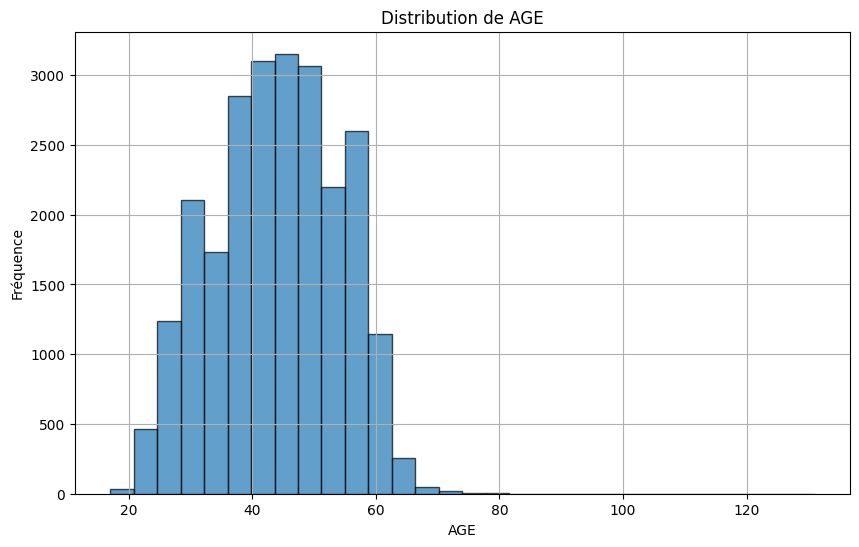

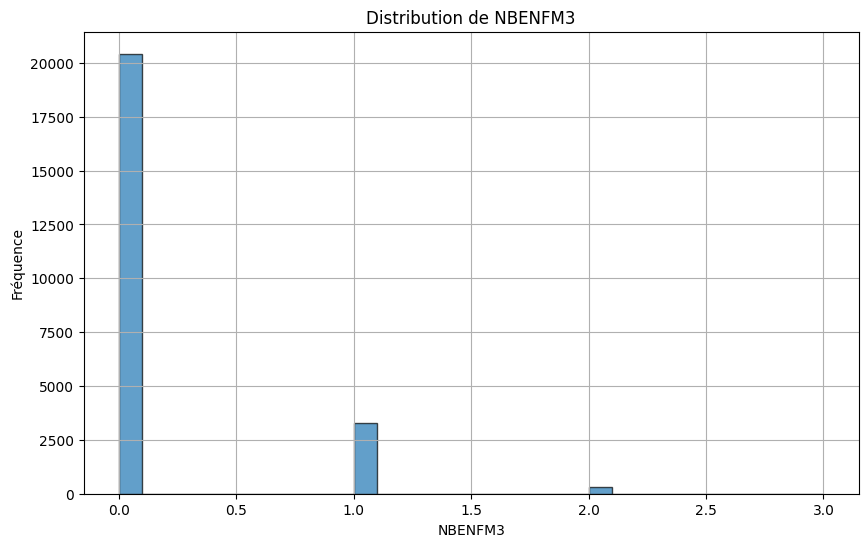

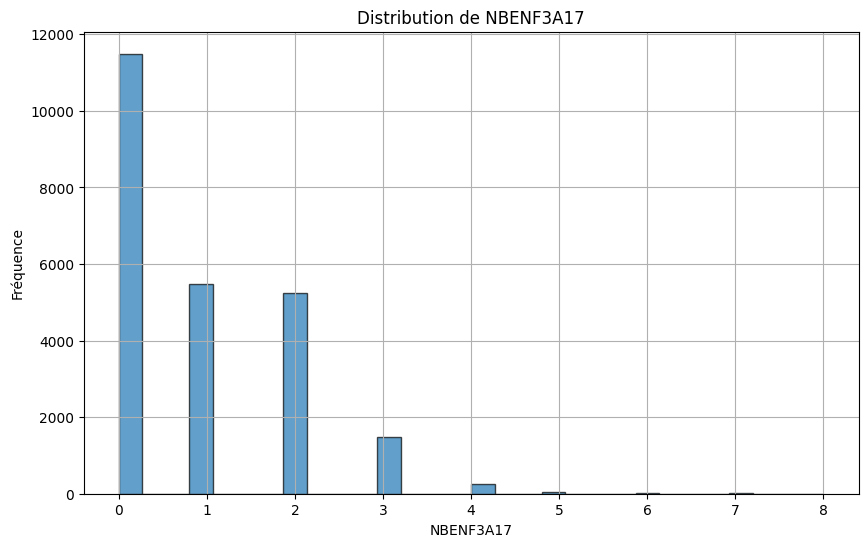

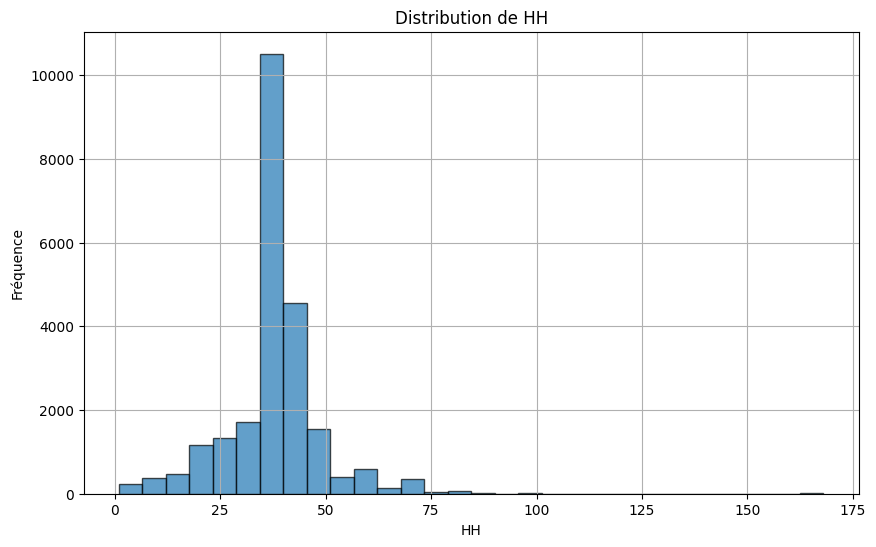

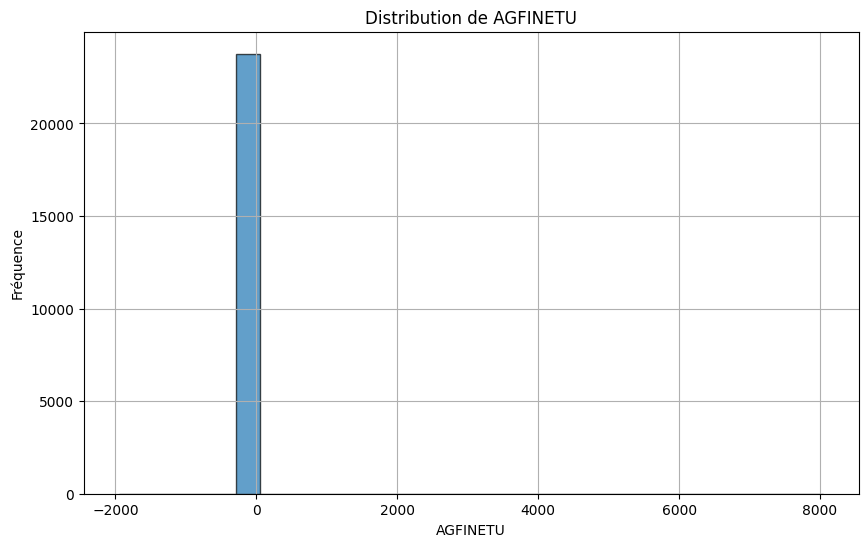

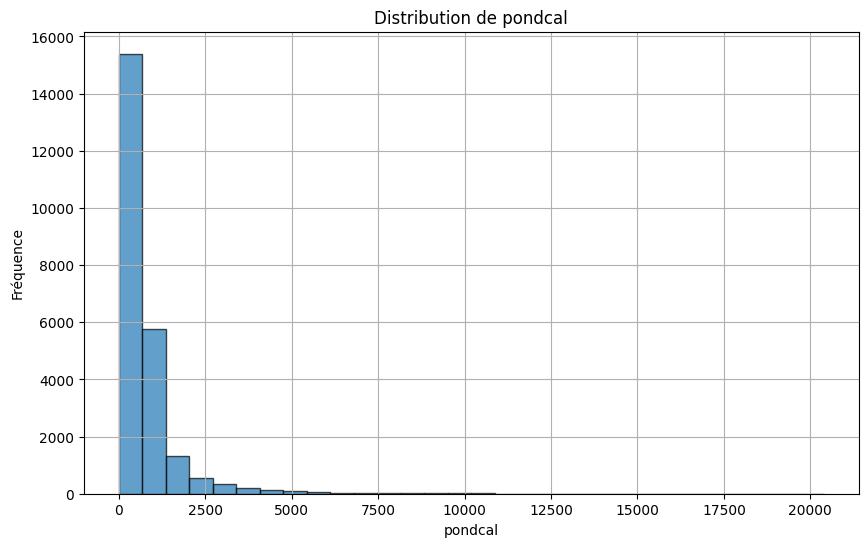

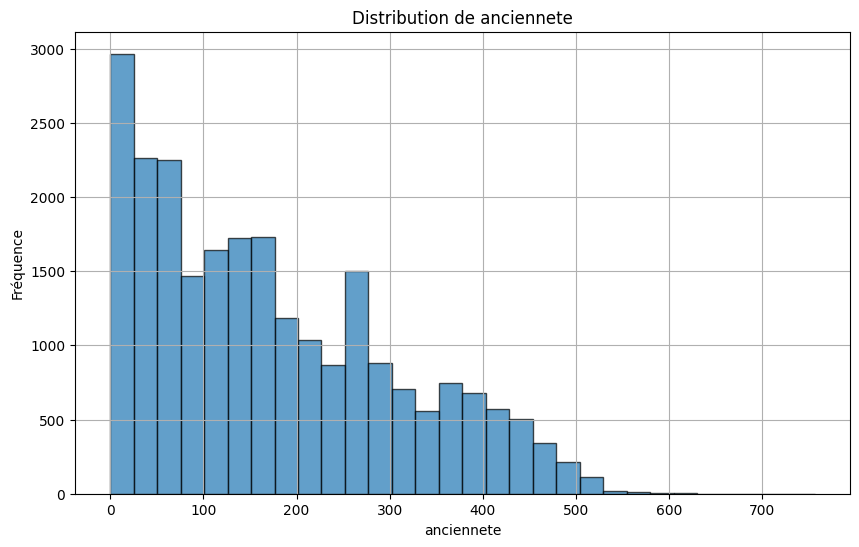

In [41]:
# Générer un histogramme pour chaque variable quantitative spécifiée
for col in quanti_cols:
    plt.figure(figsize=(10, 6))
    plt.hist(selected_df[col].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.grid(True)
    plt.show()
    plt.close() 

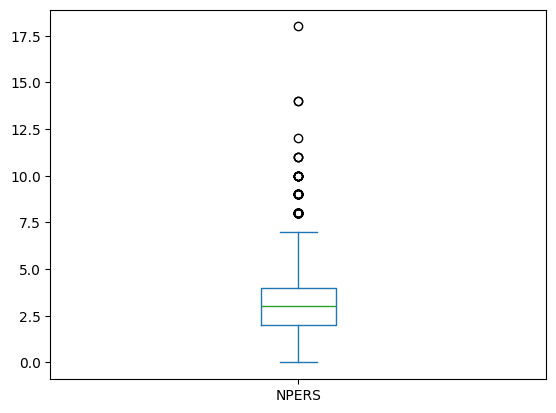

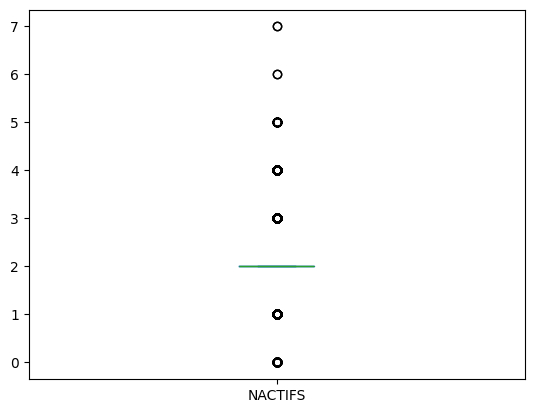

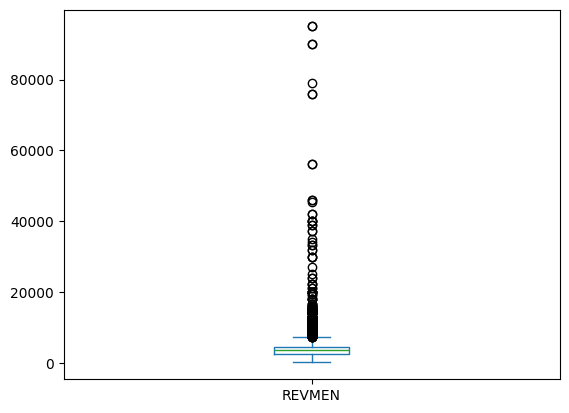

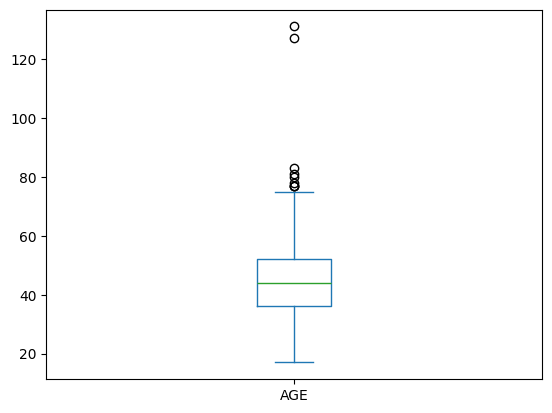

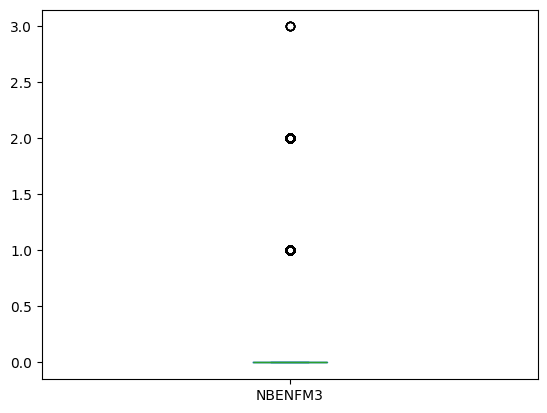

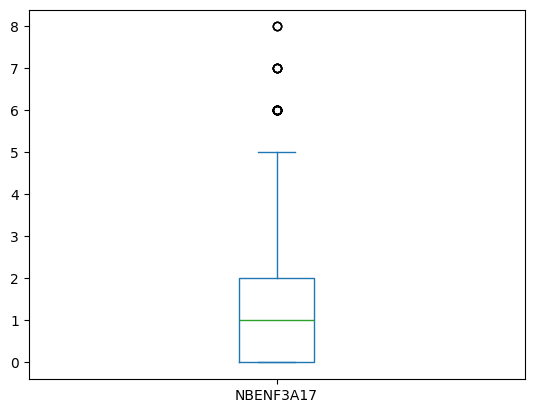

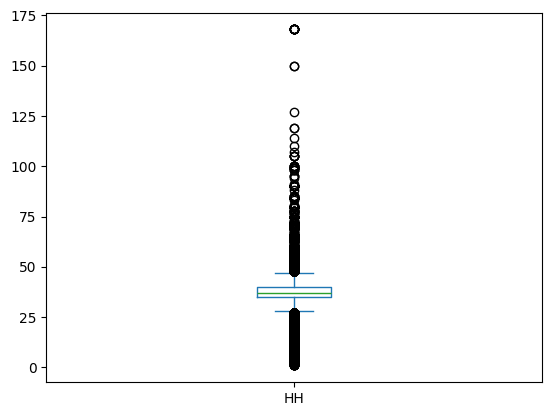

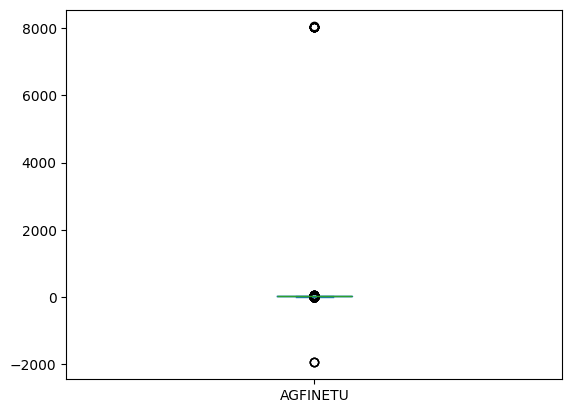

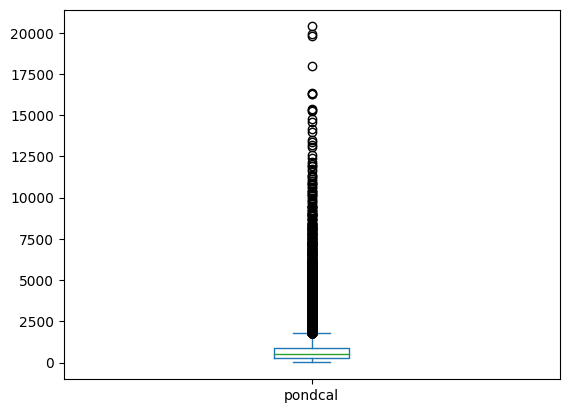

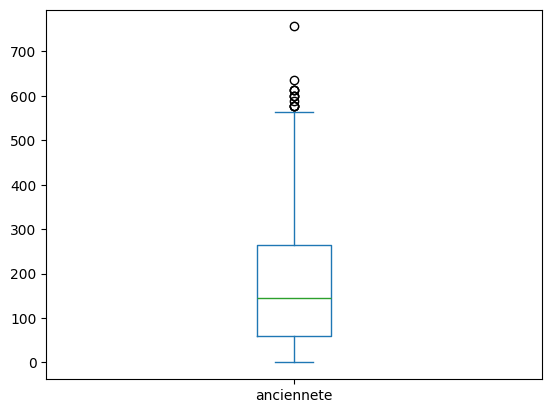

In [42]:
#Boxplot pour voir les outliers
for col in quanti_cols:
    selected_df[col].plot(kind='box')
    plt.show()


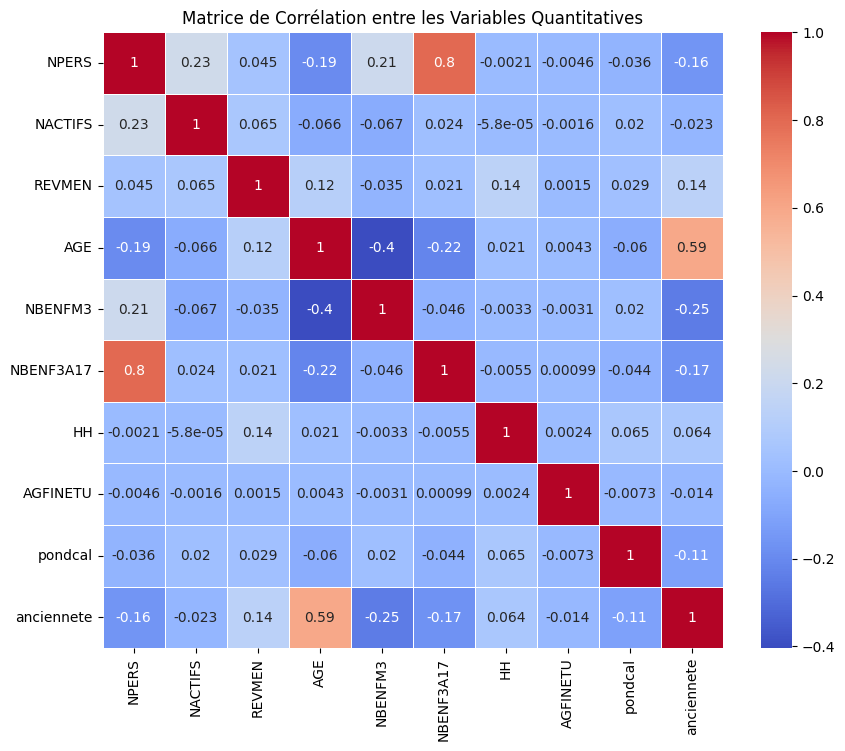

In [43]:
# Filtrer le DataFrame pour les colonnes quantitatives
df_quanti = selected_df[quanti_cols]

# Calculer la matrice de corrélation
corr_matrix = df_quanti.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de Corrélation entre les Variables Quantitatives')
plt.show()

In [44]:
#on a vu que TOTREVEN et REVMEN est identique (corr=1) on en supprime donc 1
selected_df = selected_df.drop(columns=['TOTREVEN'])

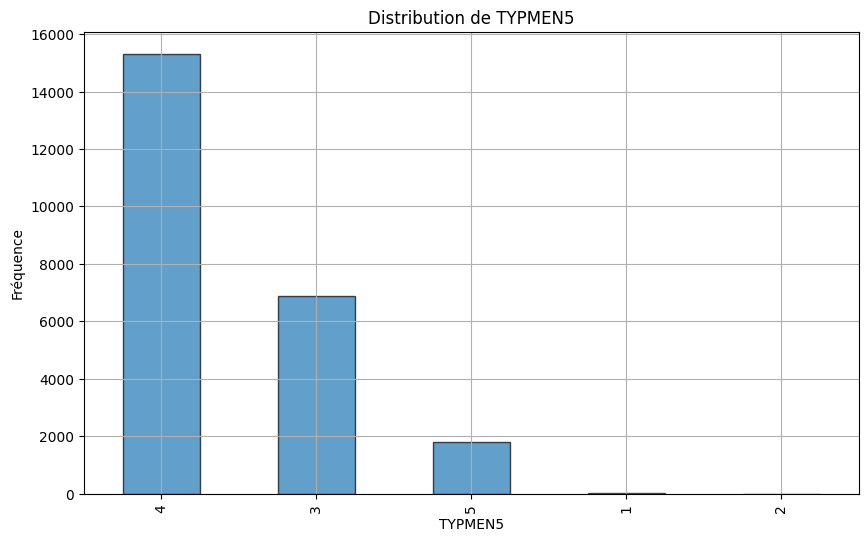

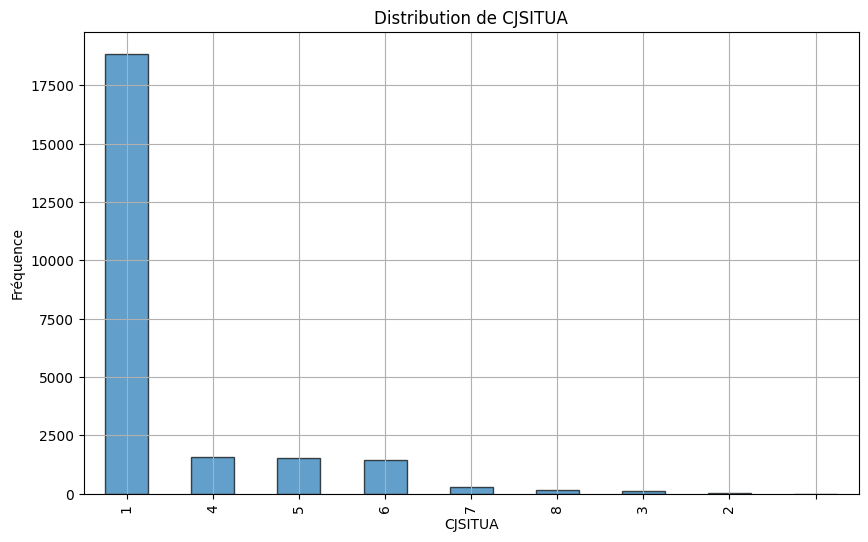

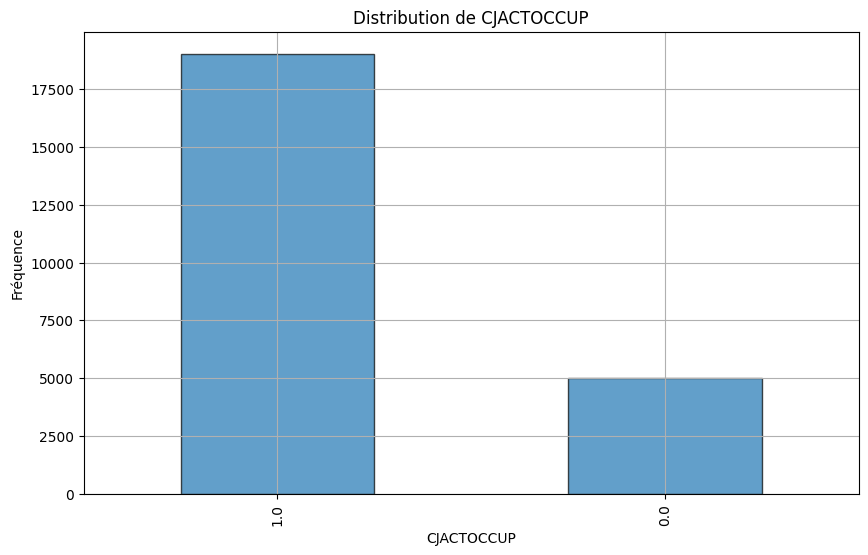

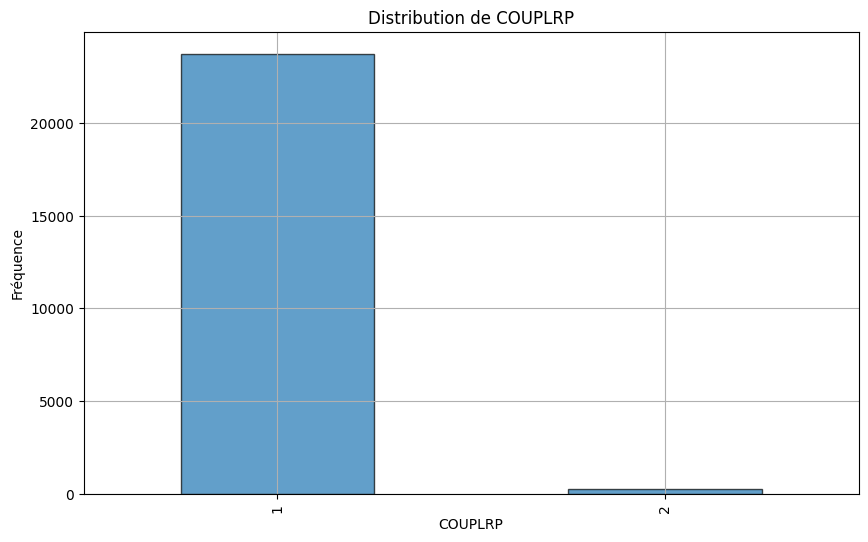

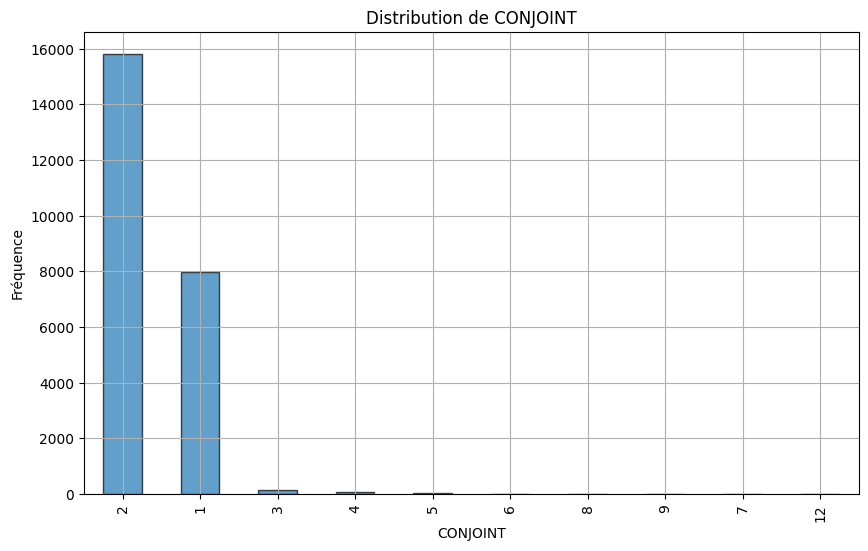

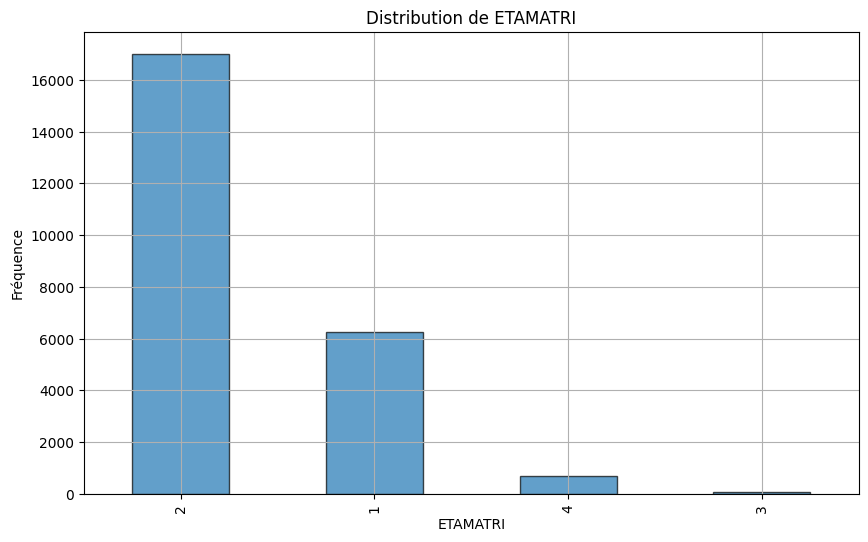

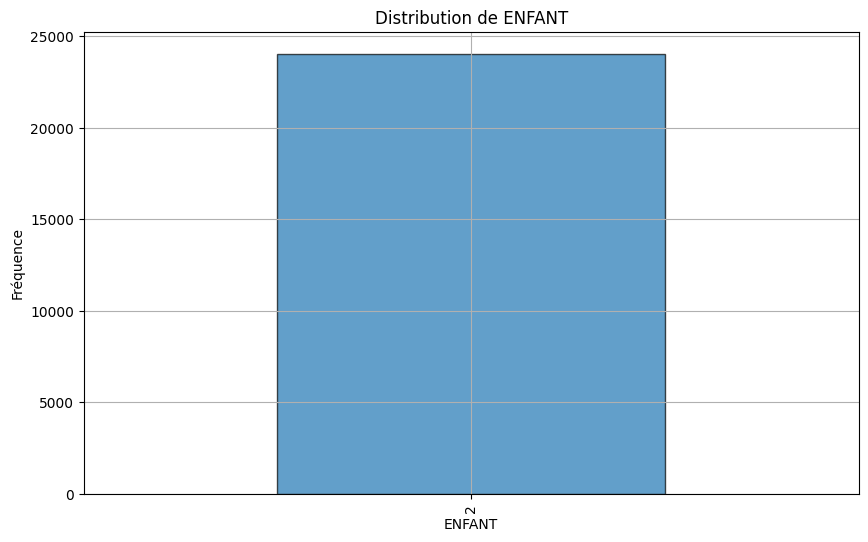

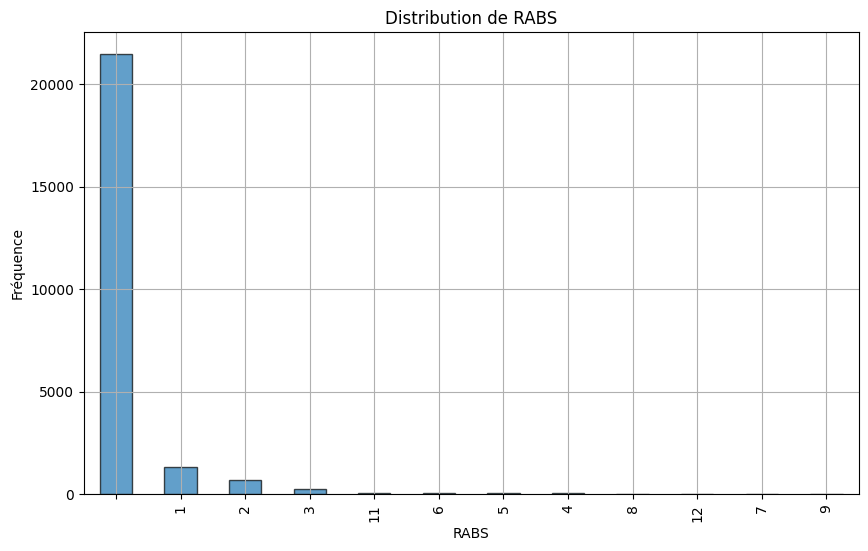

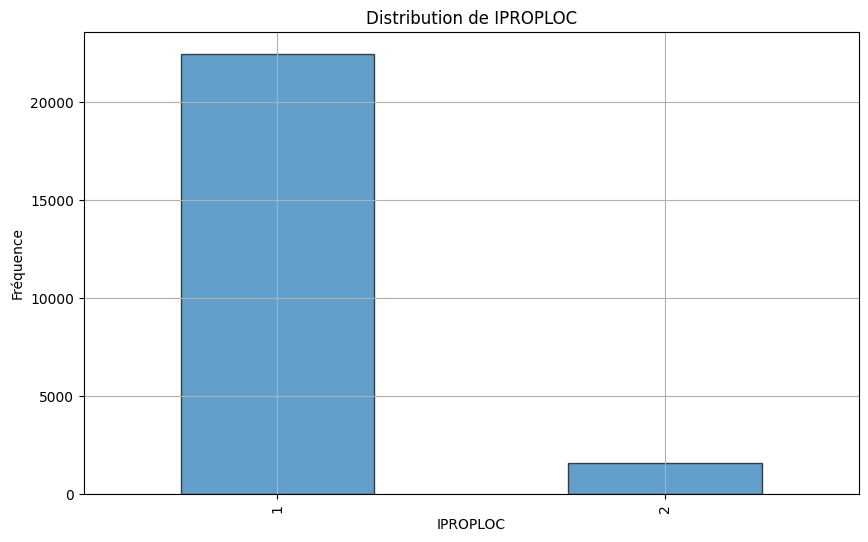

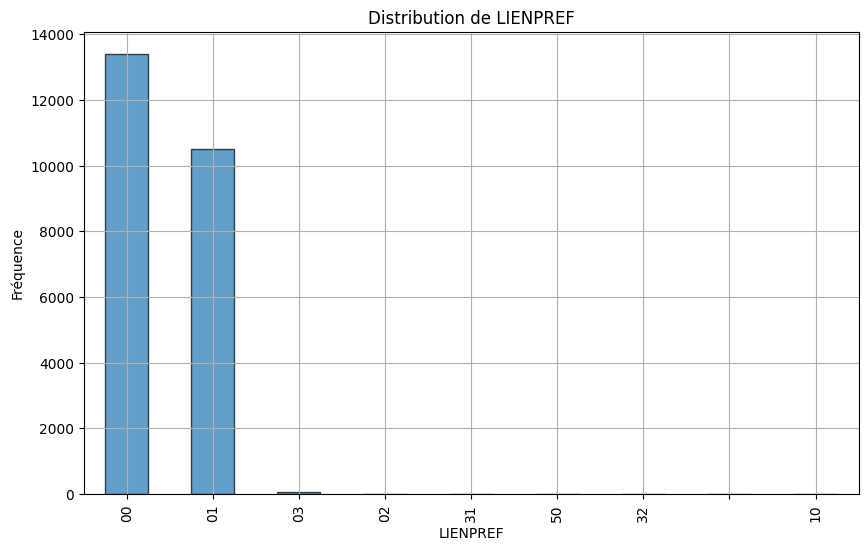

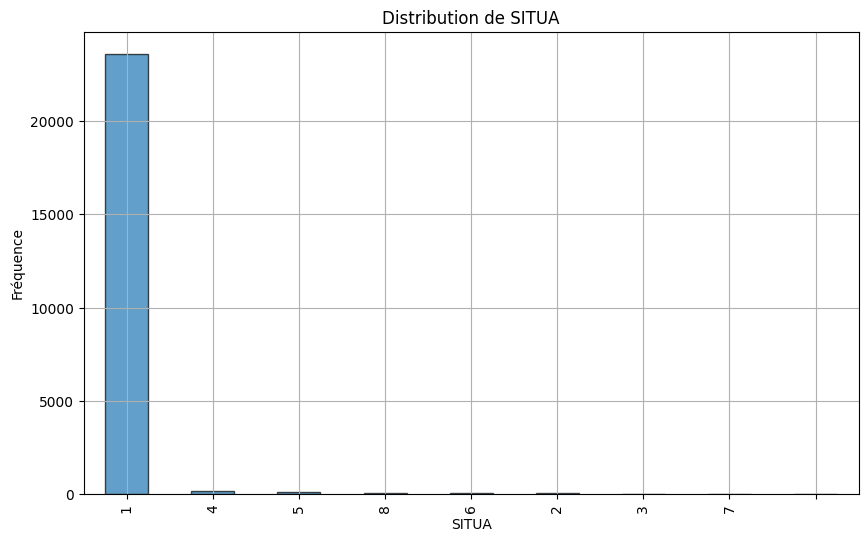

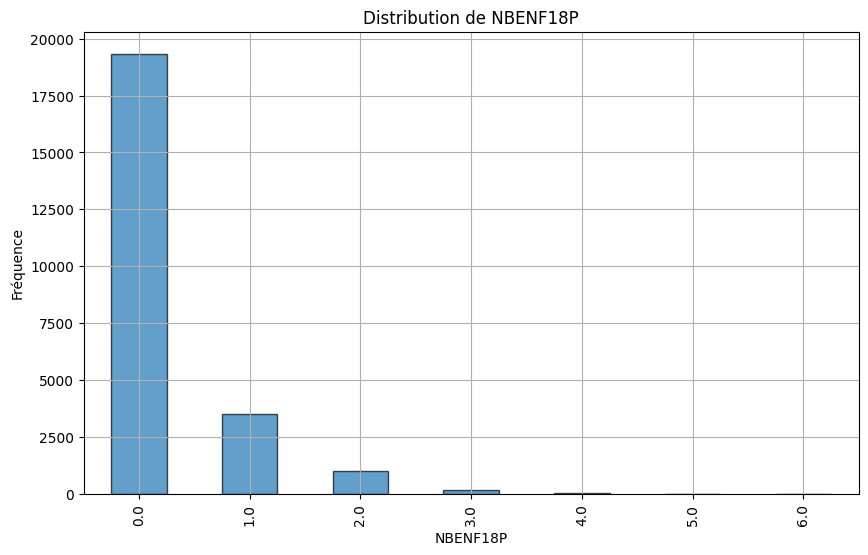

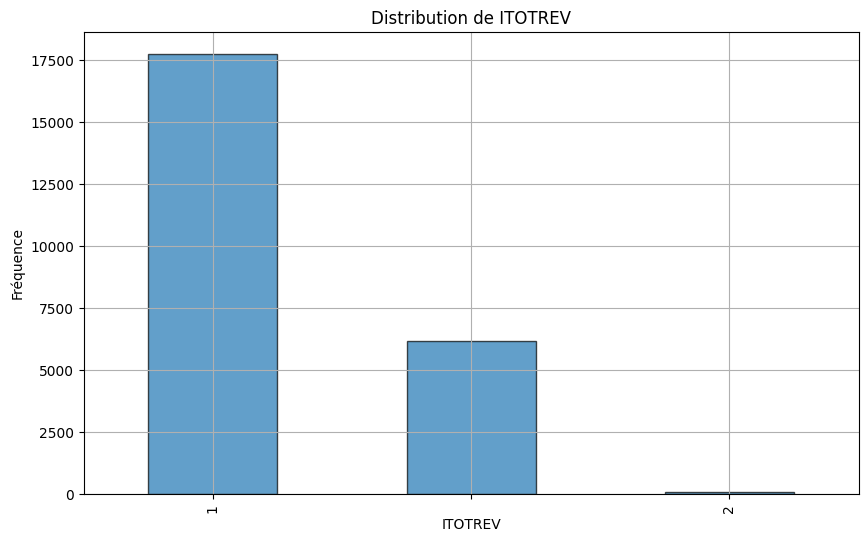

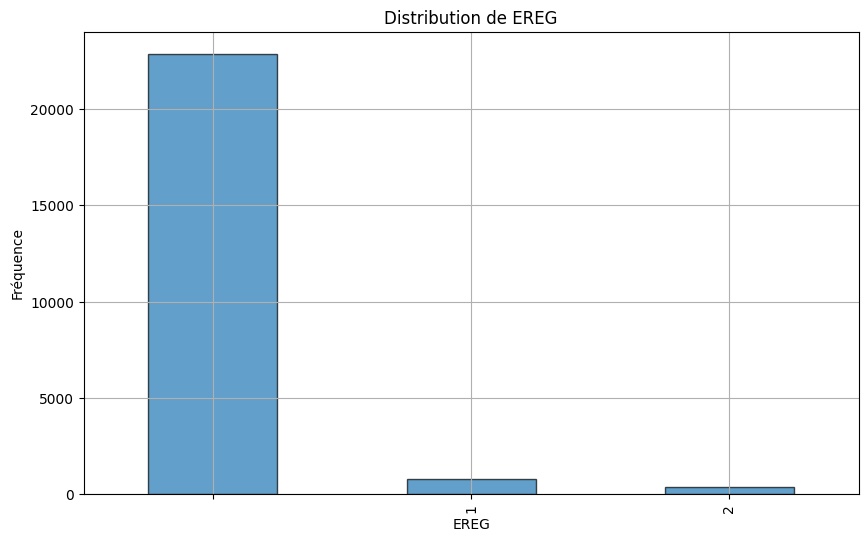

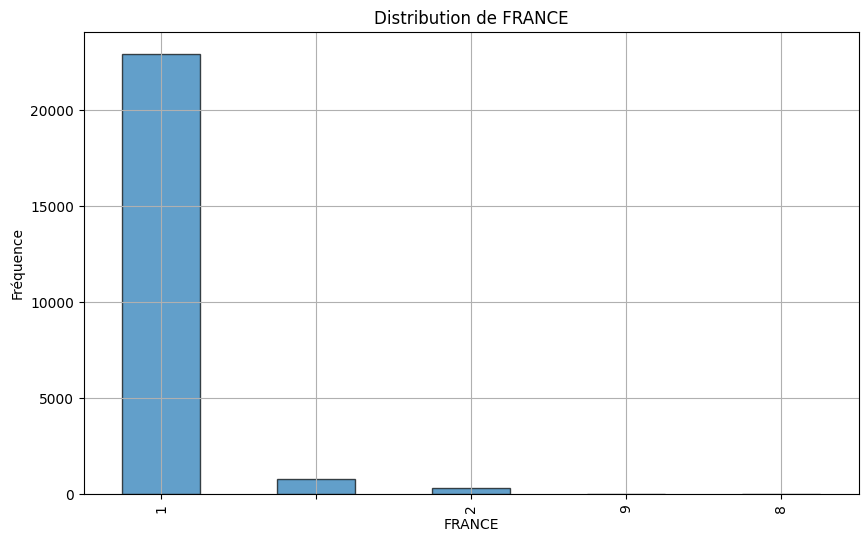

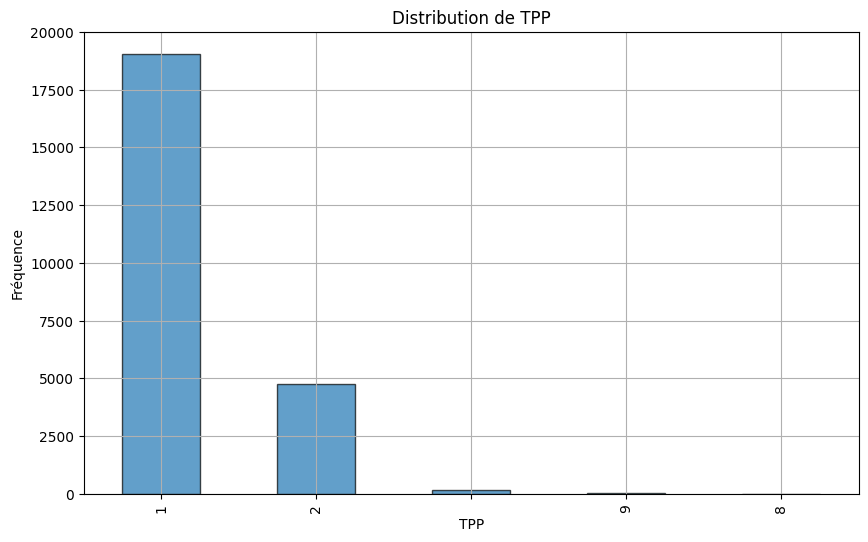

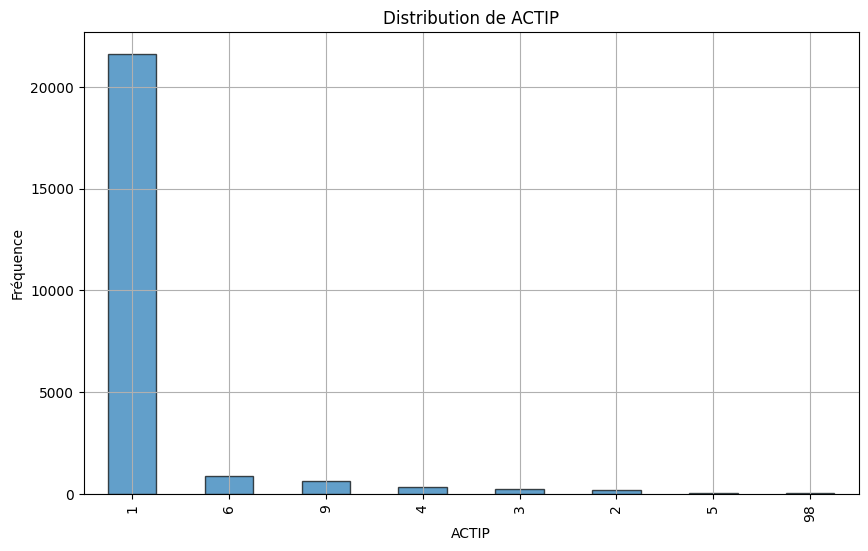

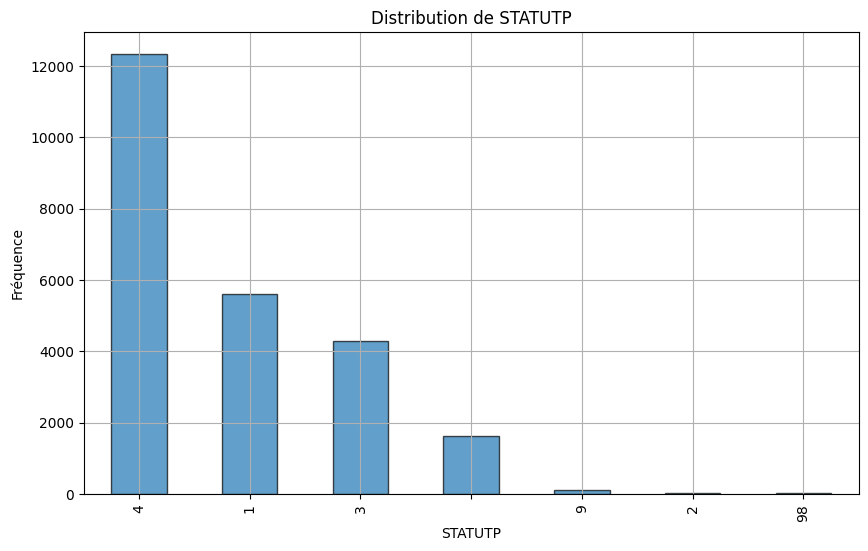

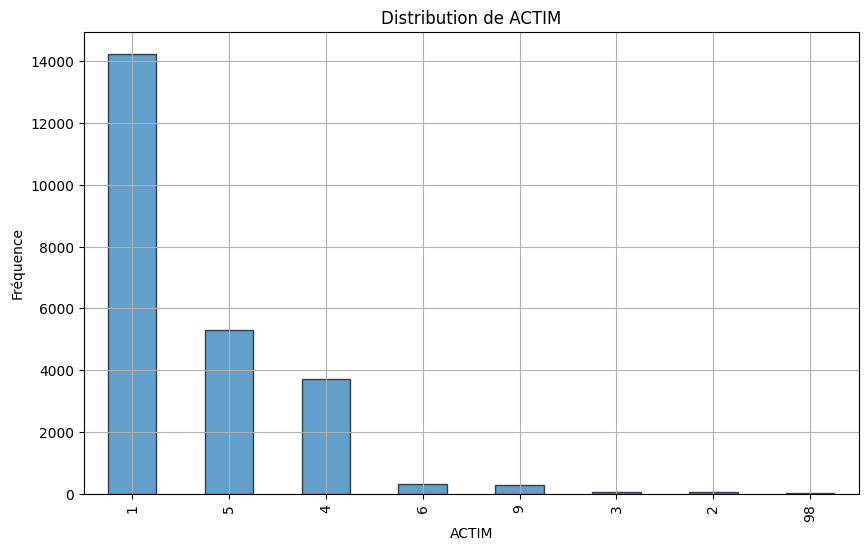

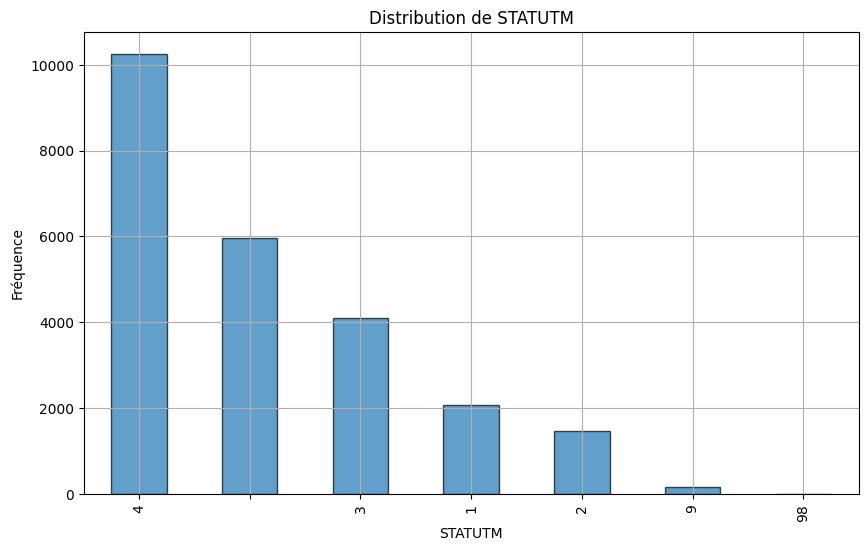

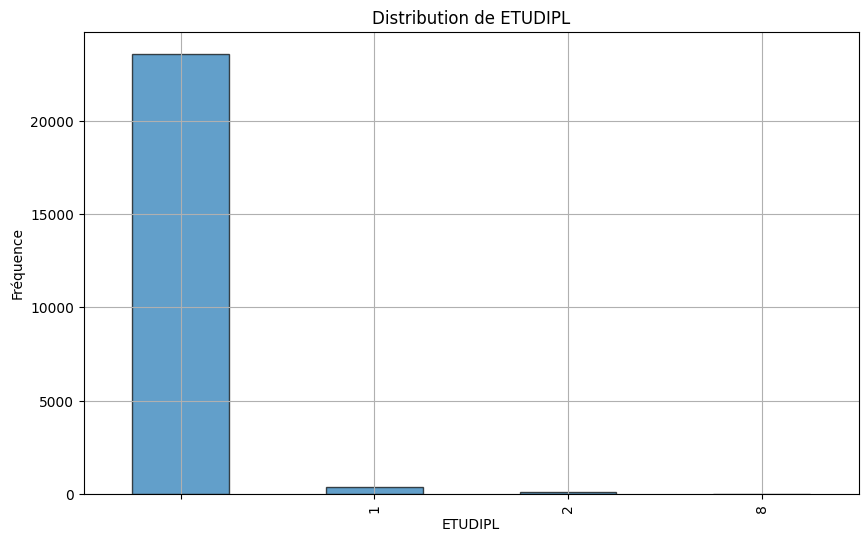

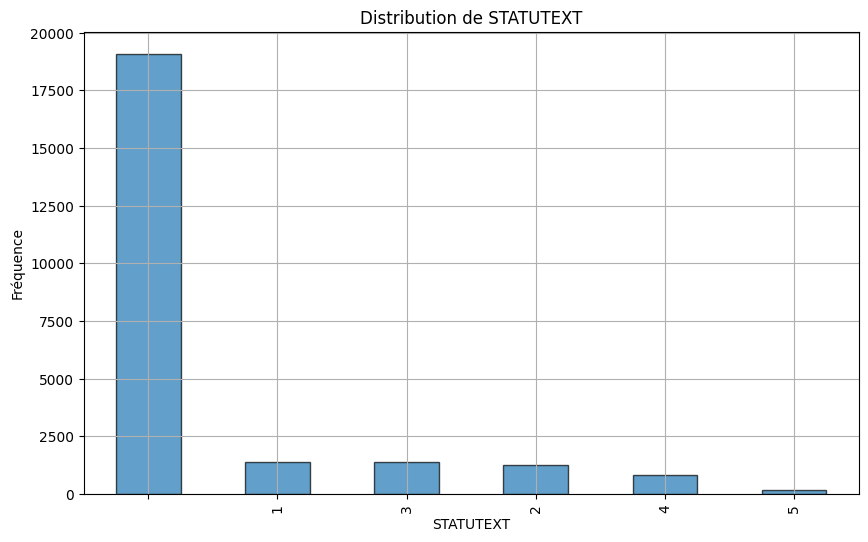

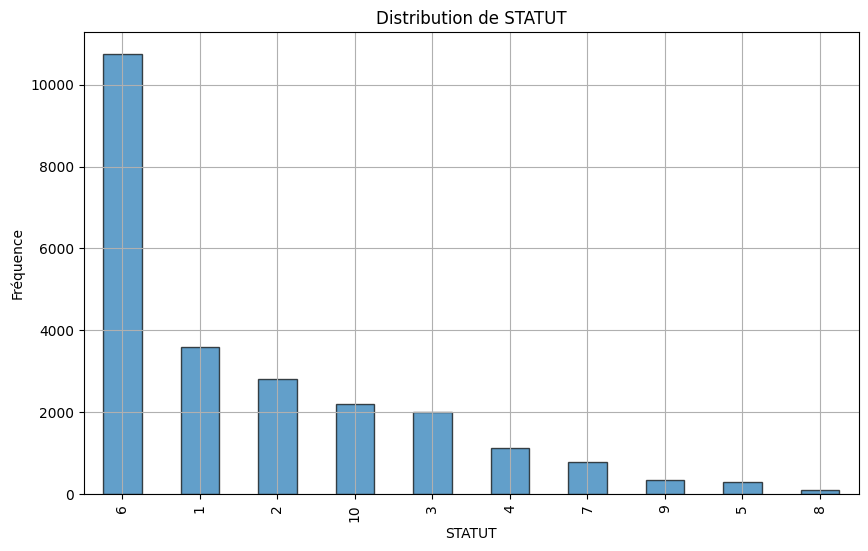

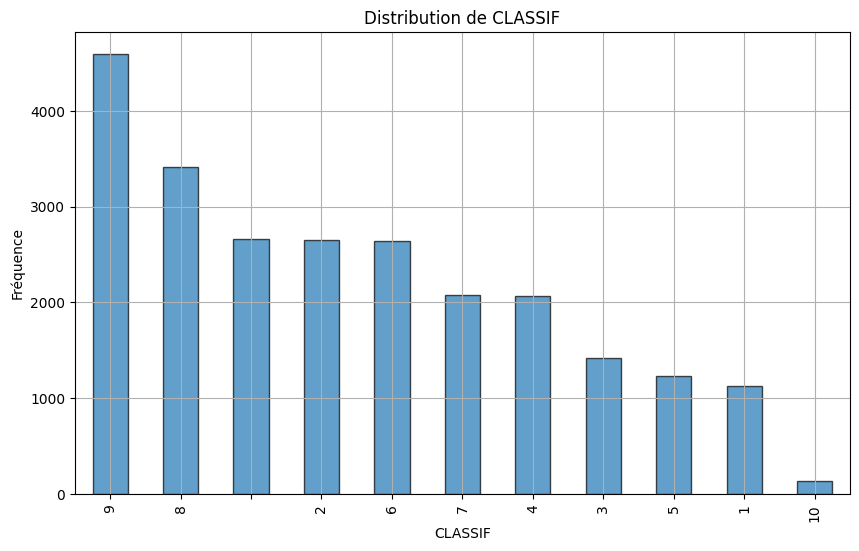

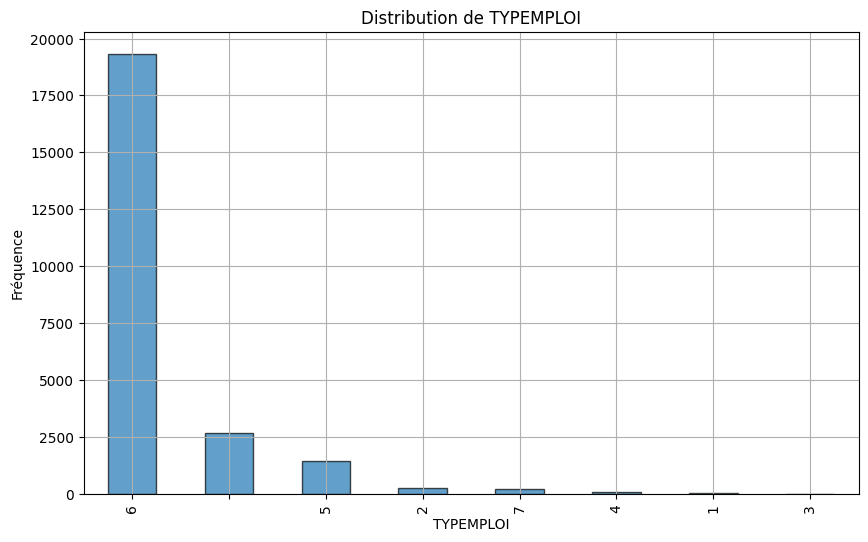

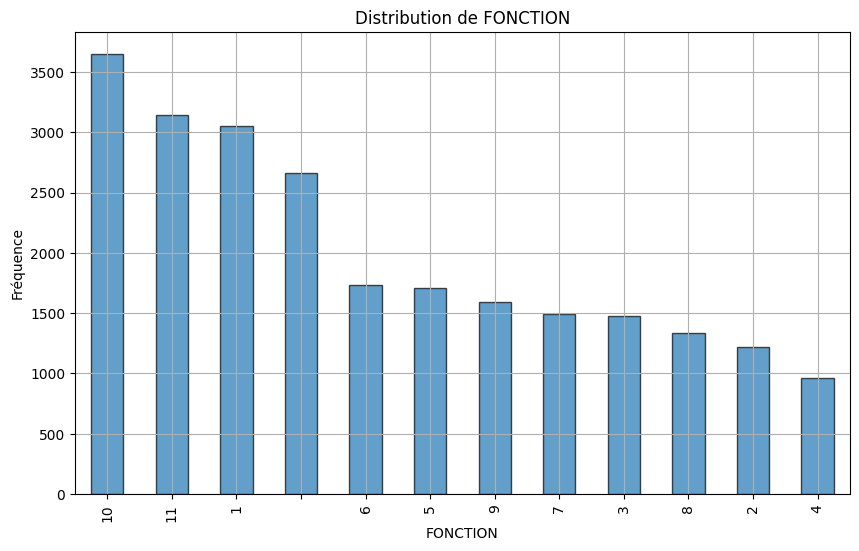

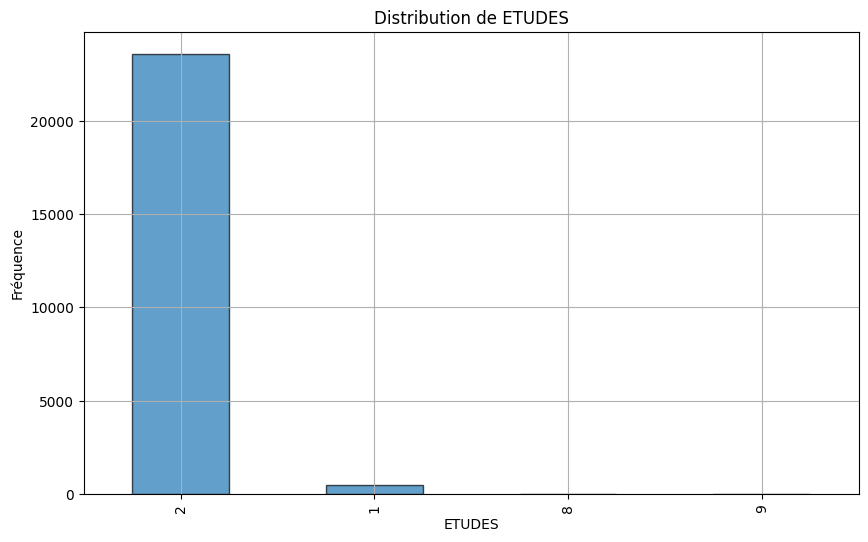

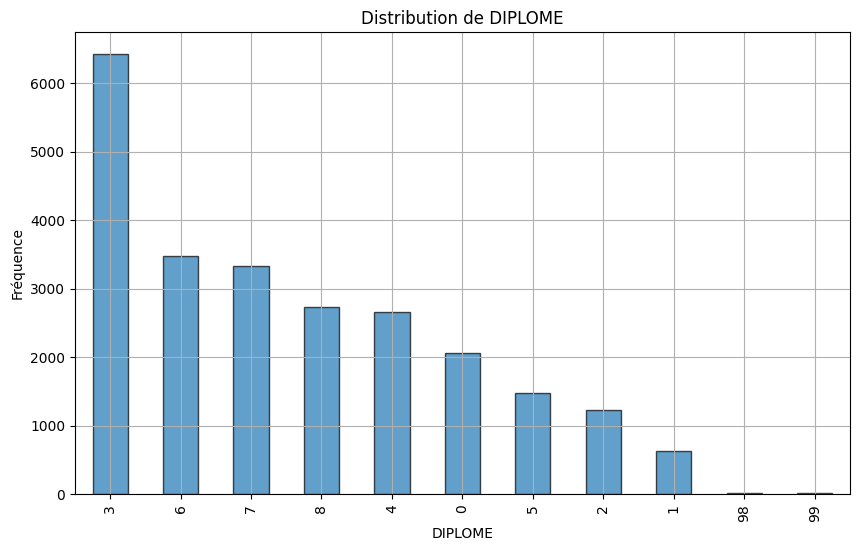

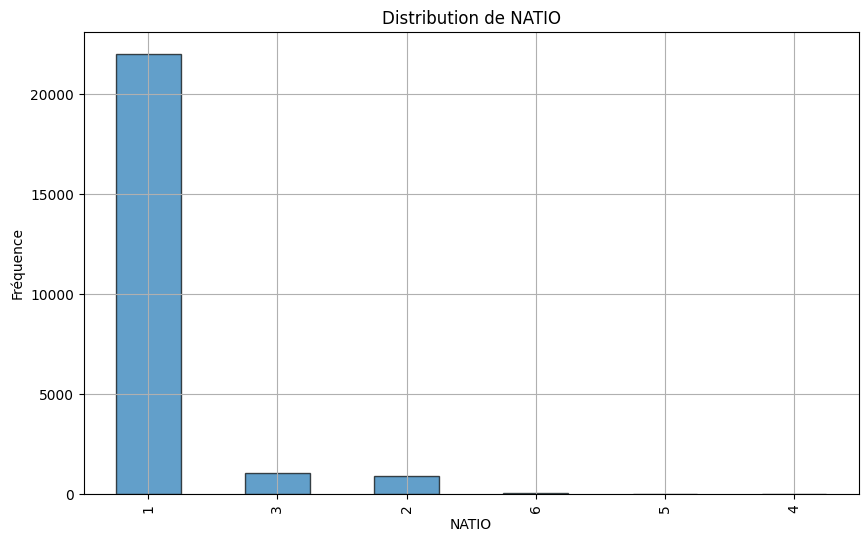

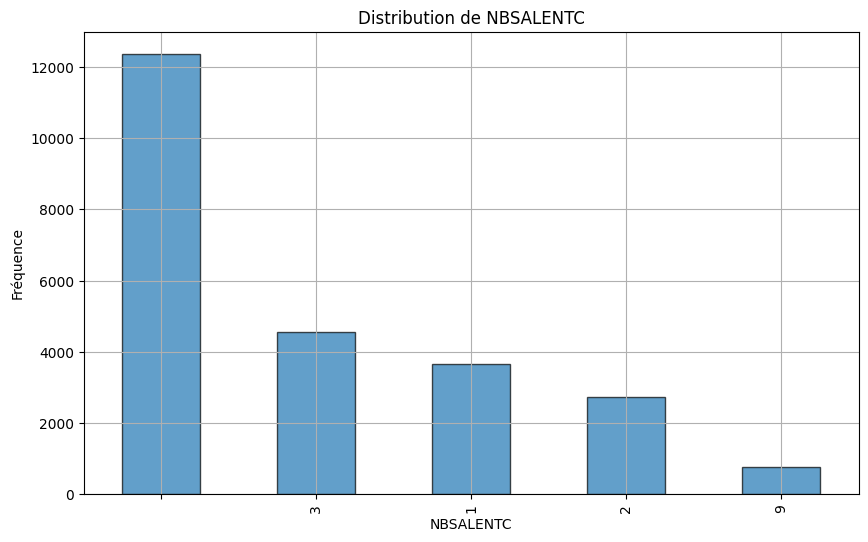

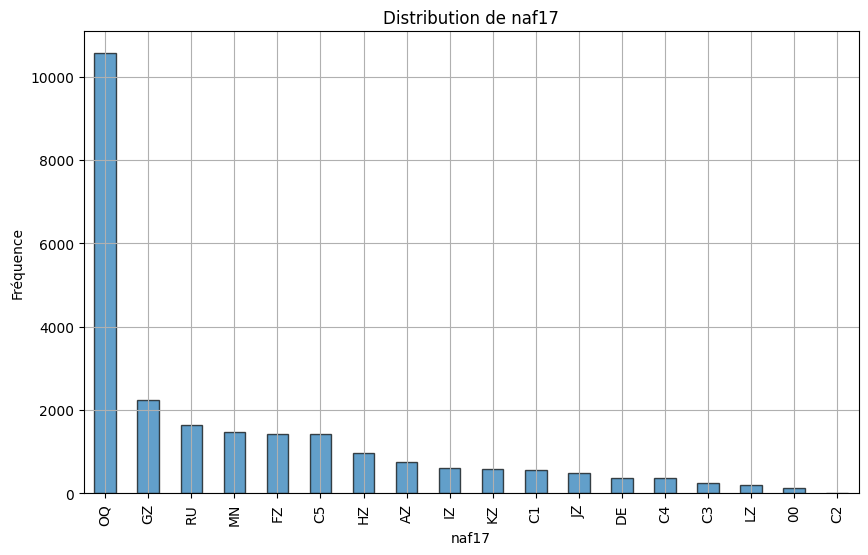

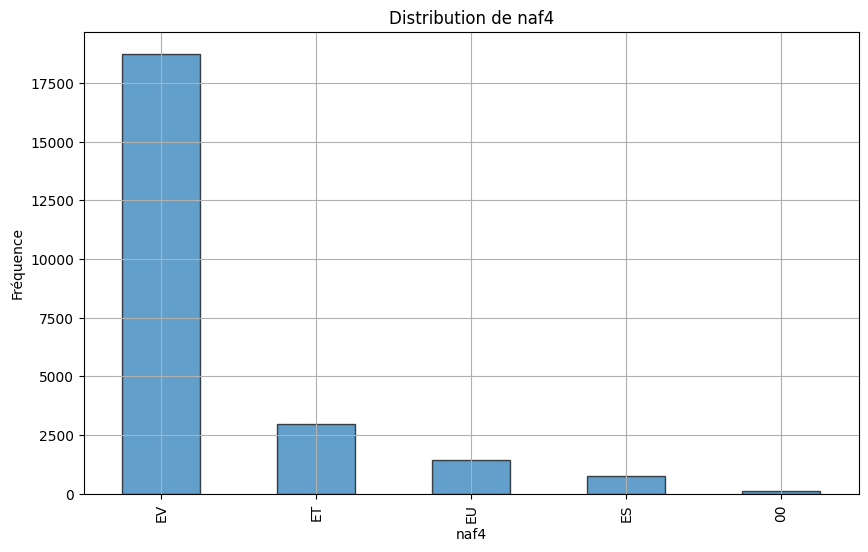

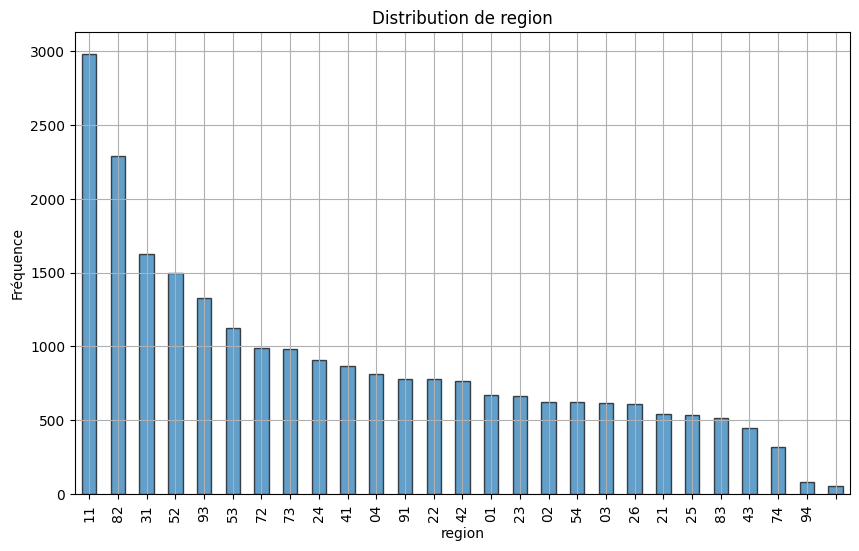

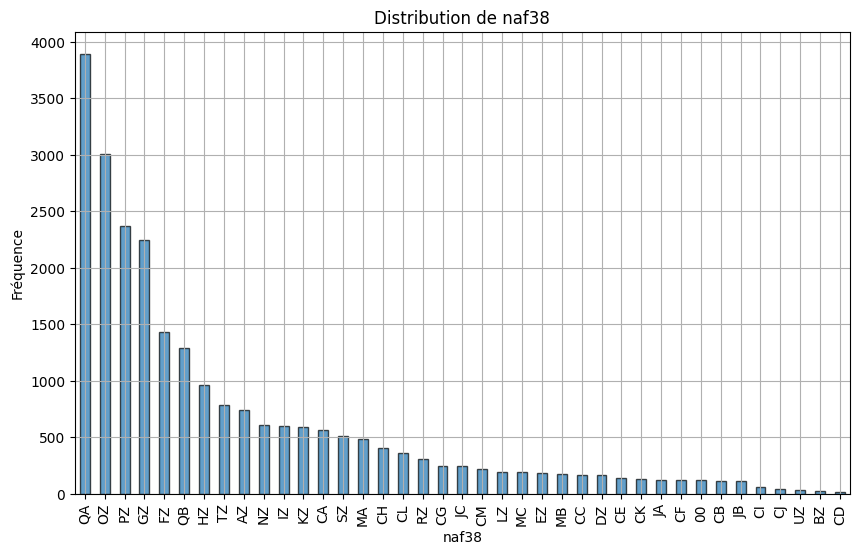

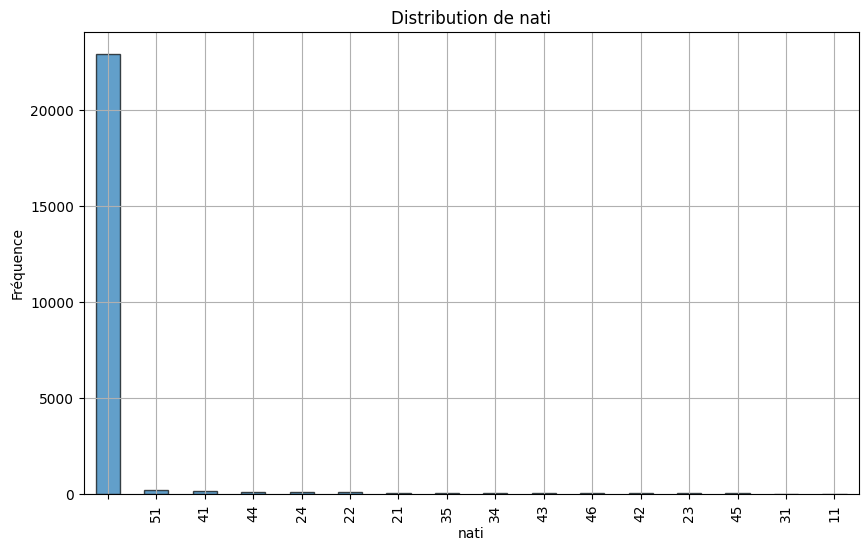

In [45]:
#Histogramme des quali
for col in quali_cols:
    plt.figure(figsize=(10, 6))
    selected_df[col].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.grid(True)
    plt.show()
    plt.close()  # Fermer la figure après l'affichage

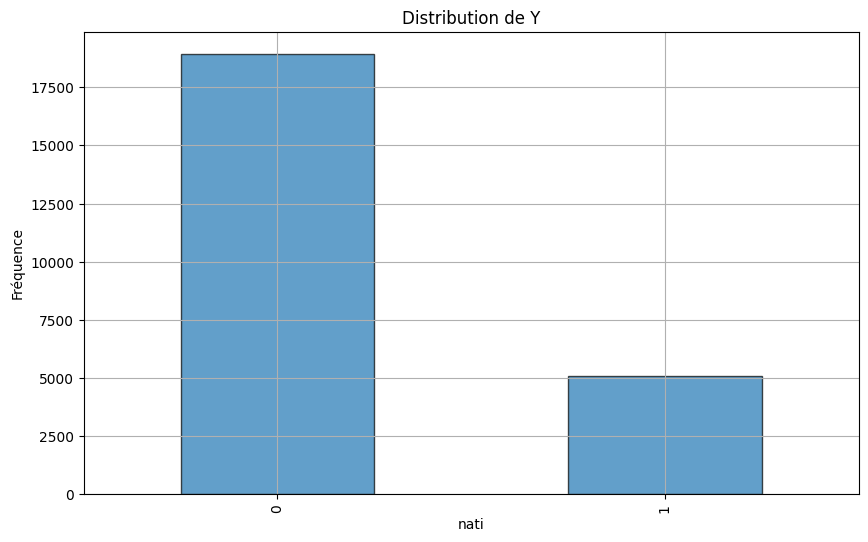

In [46]:
#Histo de Y
plt.figure(figsize=(10, 6))
selected_df['Y'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution de Y')
plt.xlabel(col)
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()


In [47]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    """Calculer le coefficient de Cramér V"""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# Supposons que selected_df est votre DataFrame
# selected_df = pd.read_csv('votre_fichier.csv')  # Exemple pour lire un fichier CSV

# Liste des colonnes qualitatives
quali_cols = ['TYPMEN5', 'CJSITUA', 'CJACTOCCUP', 'COUPLRP', 'CONJOINT', 
              'ETAMATRI', 'ENFANT', 'IPROPLOC', 'LIENPREF', 'SITUA',
              'NBENF18P', 'ITOTREV', 'EREG', 'FRANCE', 'TPP', 'ACTIP', 
              'STATUTP', 'ACTIM', 'STATUTM', 'ETUDIPL', 'STATUTEXT', 
              'STATUT', 'CLASSIF', 'TYPEMPLOI', 'FONCTION', 'ETUDES', 
              'DIPLOME', 'NATIO', 'NBSALENTC', 'naf17', 'naf4', 'region', 
              'naf38', 'nati']

# Filtrer le DataFrame pour les colonnes qualitatives
df_quali = selected_df[quali_cols]

# Initialiser la matrice de corrélation de Cramér V
corr_matrix = pd.DataFrame(index=quali_cols, columns=quali_cols)

# Calculer les coefficients de Cramér V
for col1 in quali_cols:
    for col2 in quali_cols:
        if col1 == col2:
            corr_matrix.at[col1, col2] = 1.0
        else:
            confusion_matrix = pd.crosstab(df_quali[col1], df_quali[col2])
            cramers_v_value = cramers_v(confusion_matrix)
            corr_matrix.at[col1, col2] = cramers_v_value

# Convertir les valeurs de la matrice de corrélation en type float
corr_matrix = corr_matrix.astype(float)

# Afficher la matrice de corrélation sous forme de tableau
print(corr_matrix)


C:\Users\ingemedia\AppData\Local\Temp\ipykernel_53172\3485305109.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
C:\Users\ingemedia\AppData\Local\Temp\ipykernel_53172\3485305109.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
C:\Users\ingemedia\AppData\Local\Temp\ipykernel_53172\3485305109.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
C:\Users\ingemedia\AppData\Local\Temp\ipykernel_53172\3485305109.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
C:\Users\ingemedia\AppData\Local\Temp\ipykernel_53172\3485305109.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
C:\Users\ingemedia\AppData\Local\Temp\ipykernel_53172\3485305109.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(ph

             TYPMEN5   CJSITUA  CJACTOCCUP   COUPLRP  CONJOINT  ETAMATRI  \
TYPMEN5     1.000000  0.195236    0.140681  0.098895  0.079940  0.053699   
CJSITUA     0.195236  1.000000    0.948119  0.025123  0.187131  0.095328   
CJACTOCCUP  0.140681  0.948119    1.000000  0.000666  0.140621  0.049277   
COUPLRP     0.098895  0.025123    0.000666  1.000000  0.018082  0.094633   
CONJOINT    0.079940  0.187131    0.140621  0.018082  1.000000  0.038129   
ETAMATRI    0.053699  0.095328    0.049277  0.094633  0.038129  1.000000   
ENFANT           NaN       NaN         NaN       NaN       NaN       NaN   
IPROPLOC    0.086646  0.040385    0.011550  0.017859  0.146804  0.137041   
LIENPREF    0.163155  0.373828    0.300577  0.007210  0.206857  0.046321   
SITUA       0.149639  0.358165    0.053980  0.028324  0.181793  0.056675   
NBENF18P    0.161648  0.038253    0.051084  0.031114  0.100367  0.102593   
ITOTREV     0.043794  0.039070    0.019820  0.007776  0.017158  0.045524   
EREG        

In [48]:
from scipy.stats import chi2_contingency
# Sélectionner les variables catégorielles

# Initialiser les listes pour stocker les résultats
var_names = []
chi2_stats = []
p_values = []
cramer_vs = []

# Parcourir toutes les variables catégorielles
for var in quali_cols:
    # Calculer le tableau de contingence
    contingency_table = pd.crosstab(selected_df['Y'], selected_df[var])
    # Calculer la statistique de test du Chi-deux et la p-valeur
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Calculer le coefficient V de Cramer
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r,k = contingency_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rc = r-((r-1)**2)/(n-1)
    kc = k-((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr/min(rc-1,kc-1))
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    chi2_stats.append(chi2)
    p_values.append(p)
    cramer_vs.append(cramer_v)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
    'V de Cramer': cramer_vs
})

# Trier le DataFrame par ordre croissant de V de Cramer
results_df.sort_values(by='V de Cramer', inplace=True,ascending=False)

# Afficher le tableau des résultats
print(results_df)

      Variable         Chi2       P-valeur  V de Cramer
8     LIENPREF  1805.855593   0.000000e+00     0.273567
24    FONCTION  1602.033383   0.000000e+00     0.257351
32       naf38  1451.191571  3.756754e-280     0.242542
29       naf17  1126.786543  6.473126e-229     0.214934
1      CJSITUA  1081.203884  4.389888e-228     0.211362
21      STATUT   841.184778  2.887604e-175     0.186121
22     CLASSIF   820.121338  9.735137e-170     0.183637
30        naf4   570.419591  3.905209e-122     0.153552
26     DIPLOME   459.155662   2.326607e-92     0.136737
20   STATUTEXT   446.994010   2.186084e-94     0.135642
2   CJACTOCCUP   204.164793   2.576477e-46     0.091970
28   NBSALENTC   198.303431   8.701926e-42     0.089935
0      TYPMEN5   106.114013   4.903281e-22     0.065197
23   TYPEMPLOI   104.281082   1.405819e-19     0.063636
31      region    98.839478   2.000209e-10     0.055064
18     STATUTM    41.853864   1.965065e-07     0.038633
33        nati    40.969053   3.232852e-04     0

C:\Users\ingemedia\AppData\Local\Temp\ipykernel_53172\101963382.py:23: RuntimeWarning: invalid value encountered in scalar divide
  cramer_v = np.sqrt(phi2corr/min(rc-1,kc-1))


In [49]:
#déséquilibre de classe 

### bivarié 

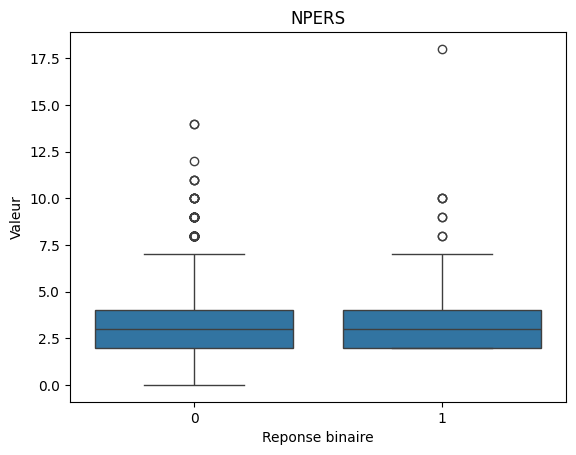

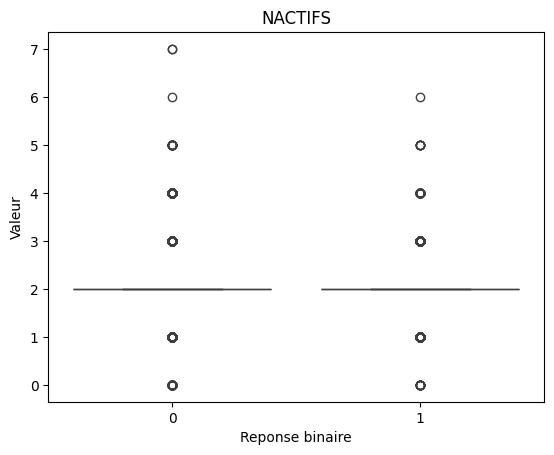

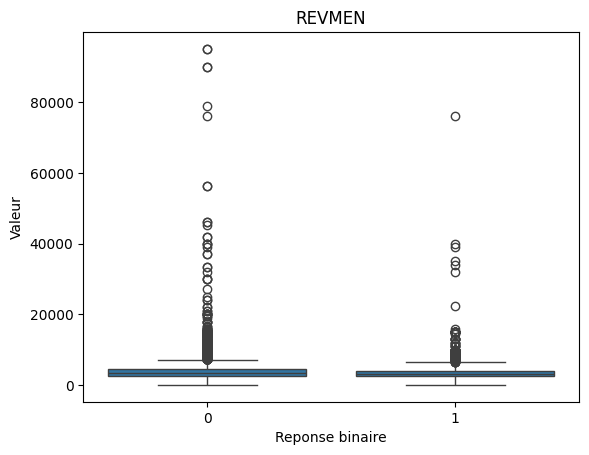

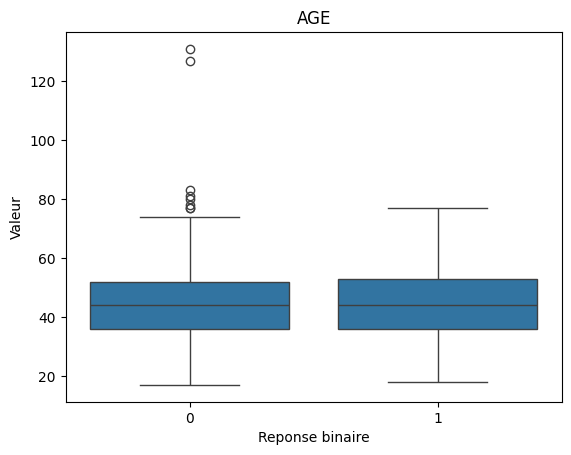

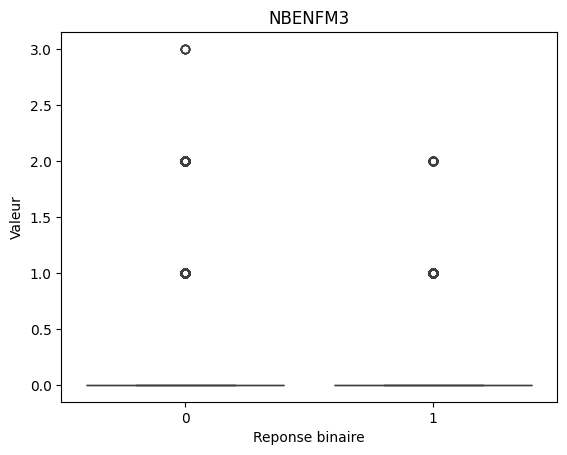

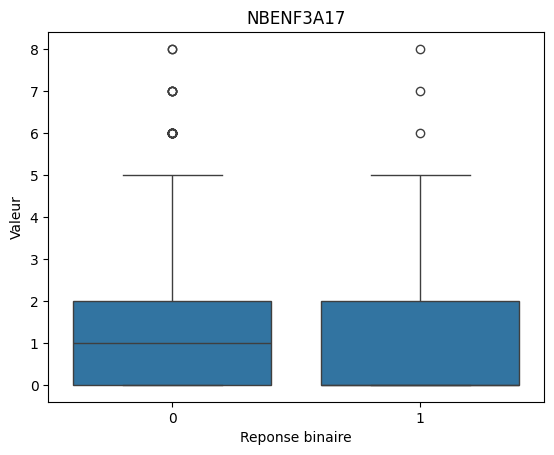

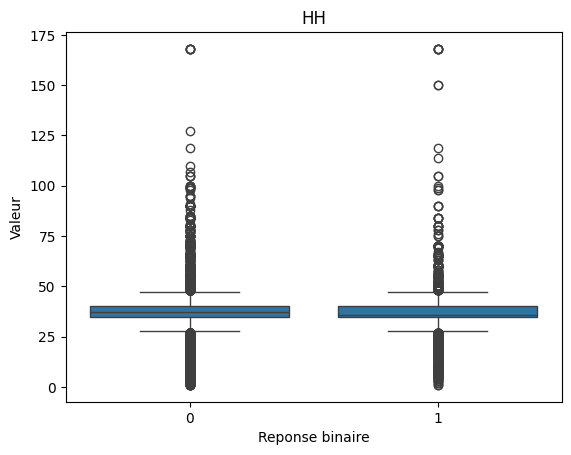

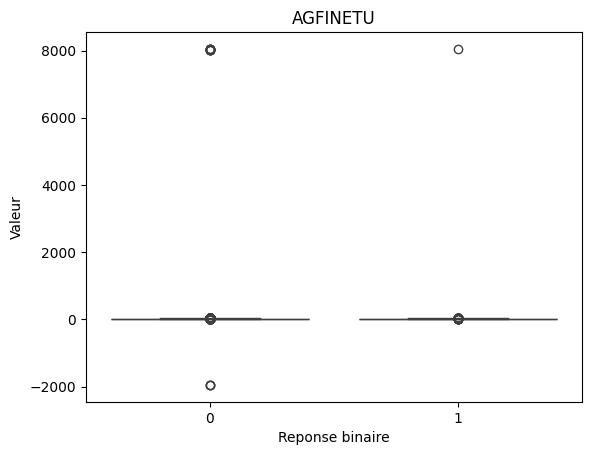

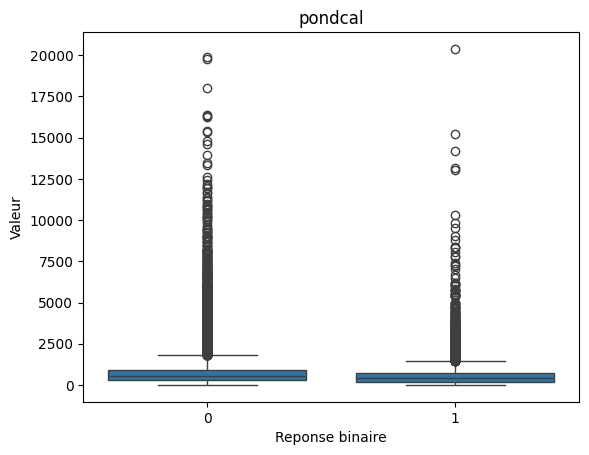

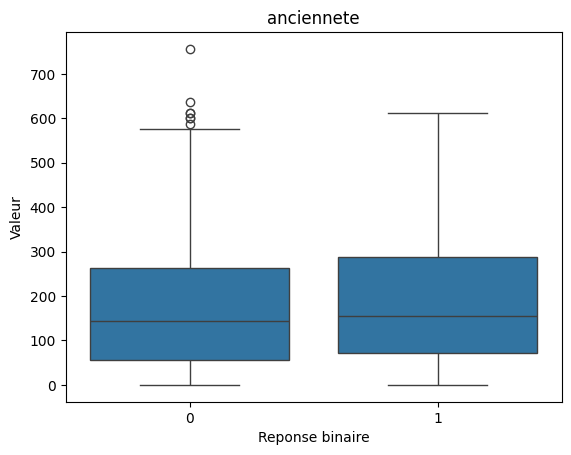

In [50]:
for col in quanti_cols:
    sns.boxplot(x='Y', y=col, data=selected_df)
    plt.title(col)
    plt.xlabel('Reponse binaire')
    plt.ylabel('Valeur')
    plt.show()

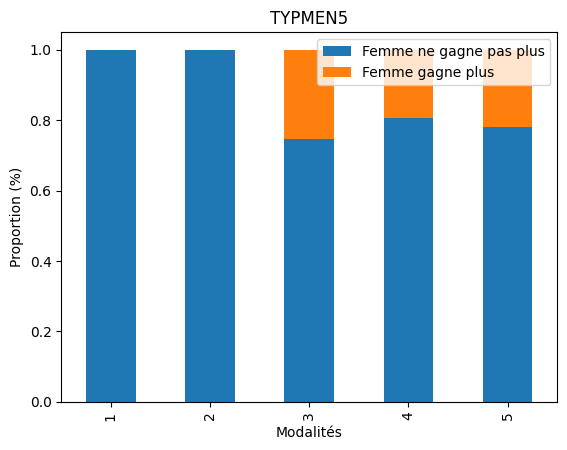

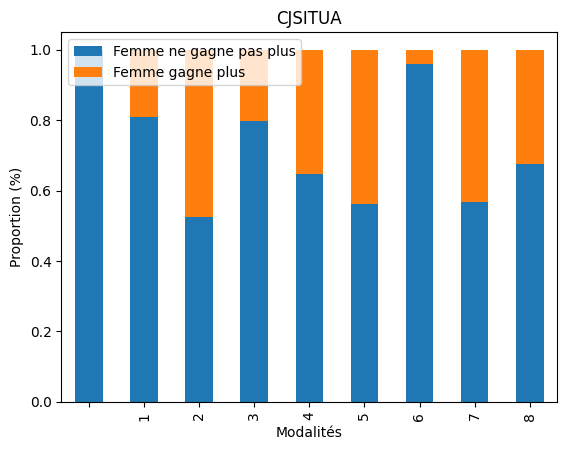

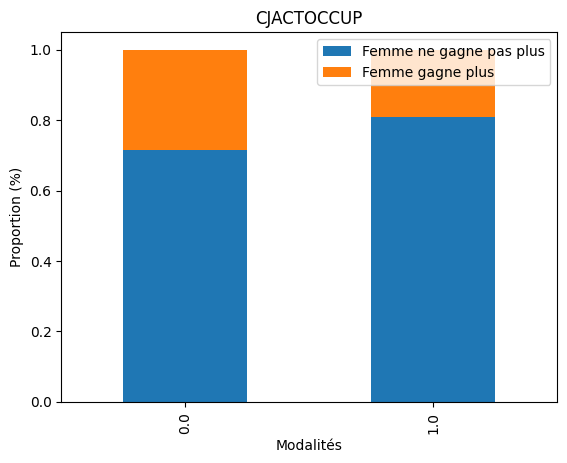

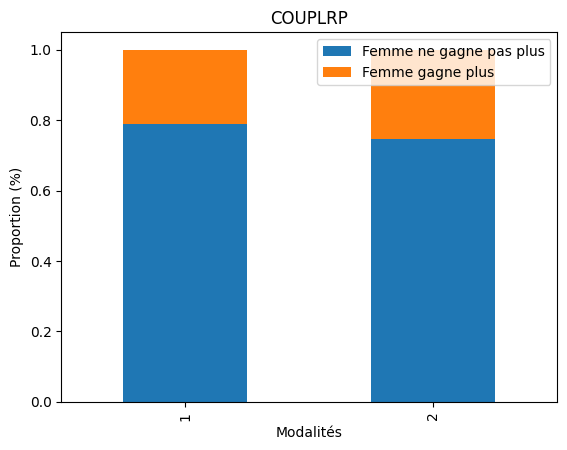

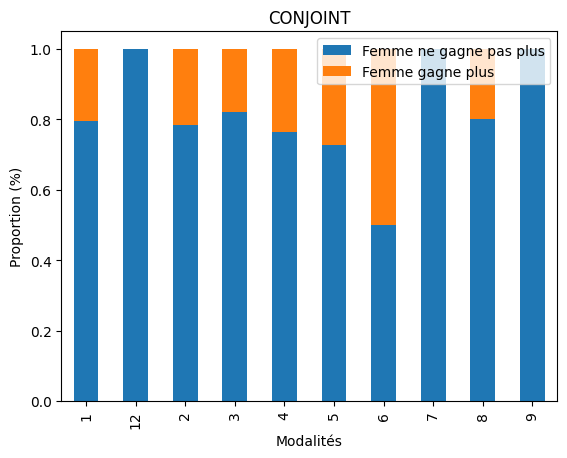

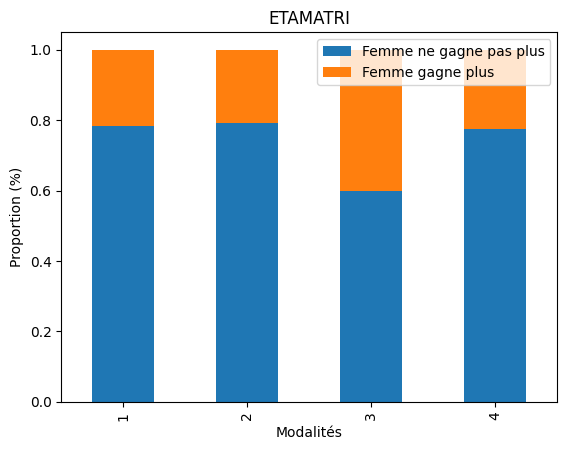

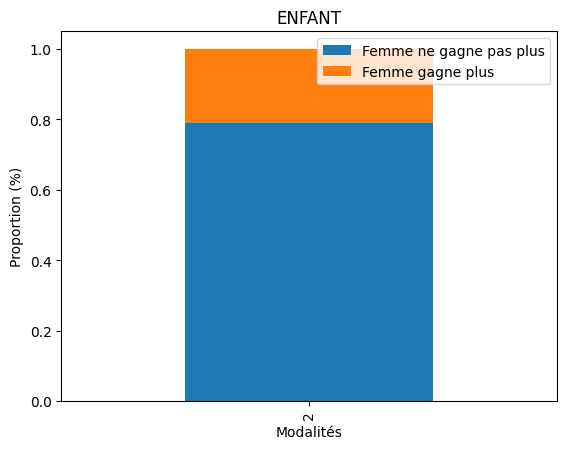

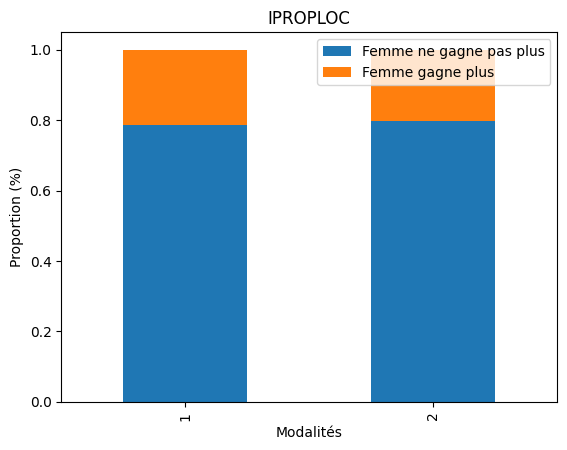

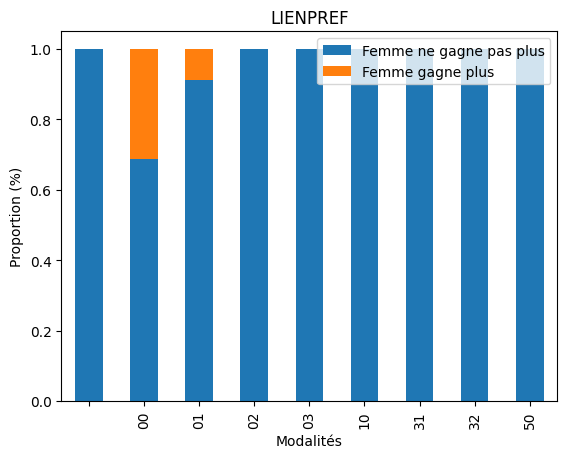

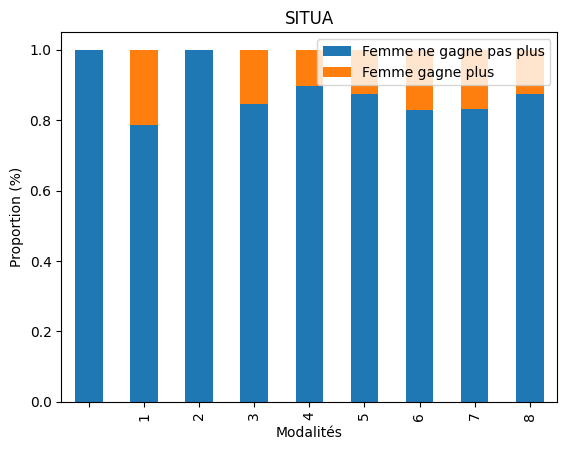

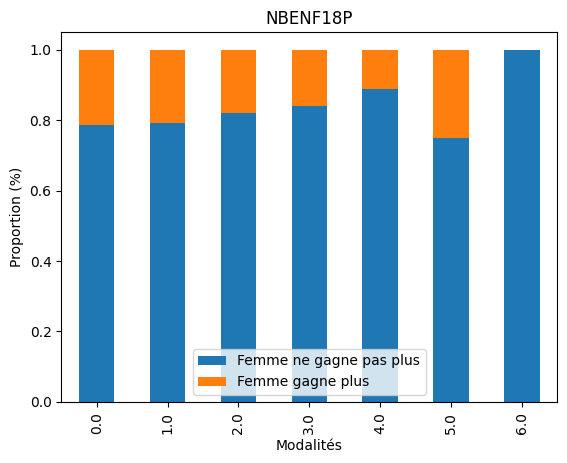

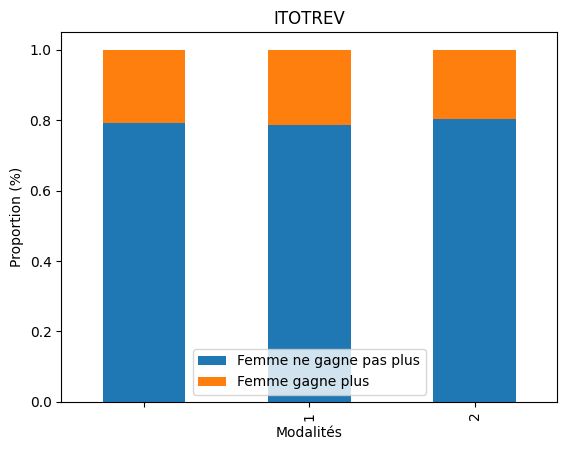

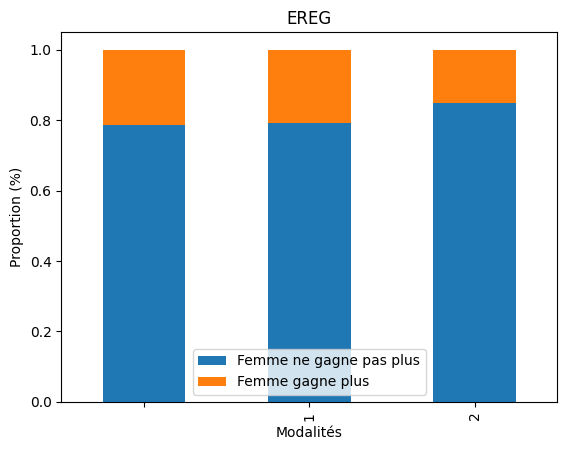

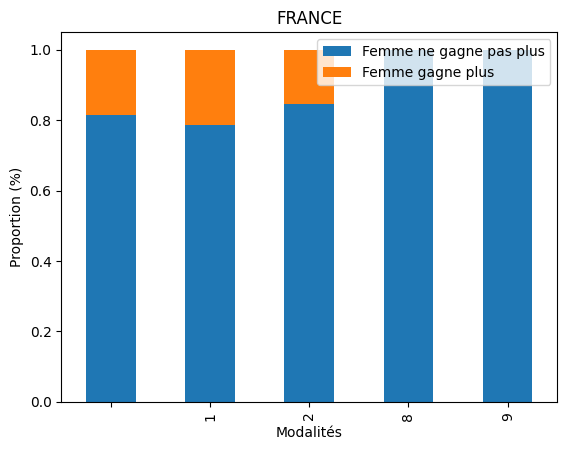

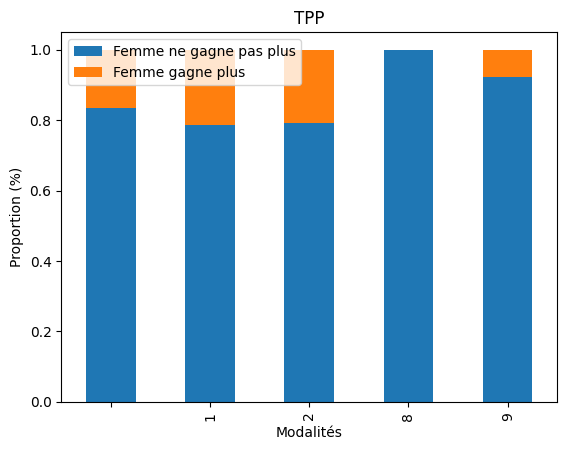

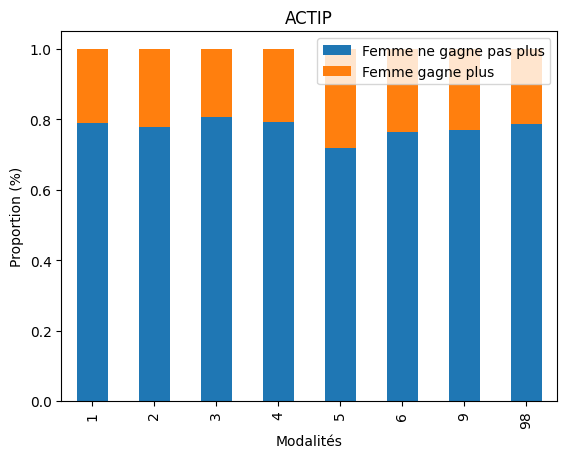

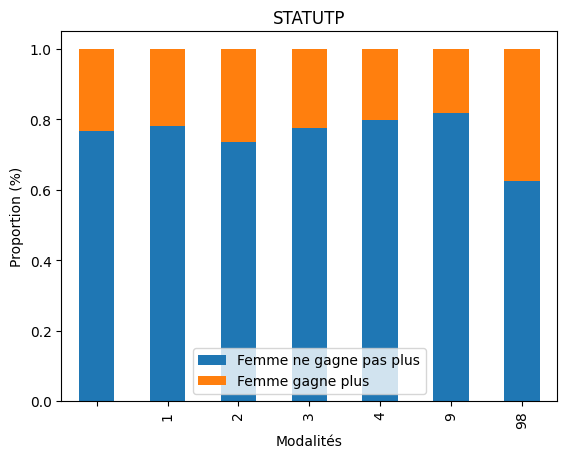

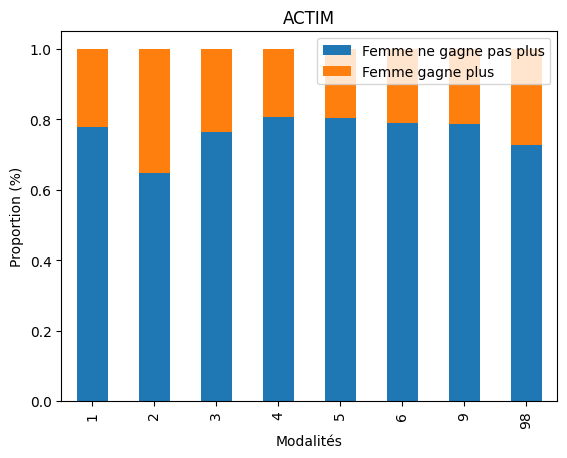

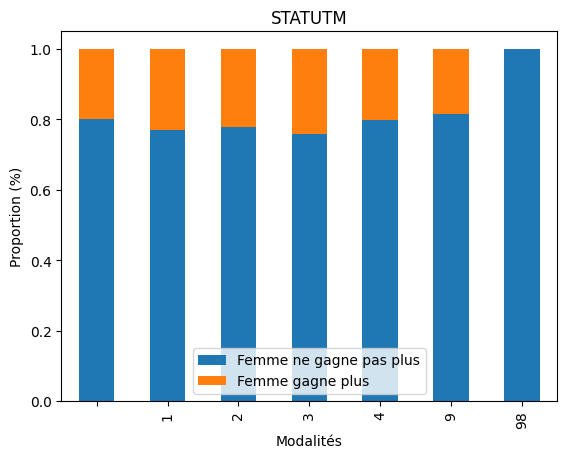

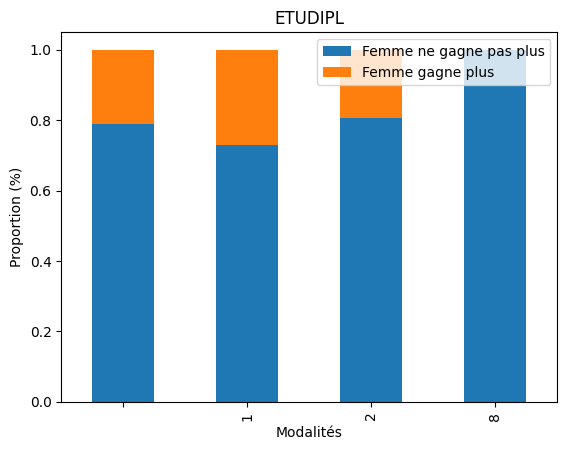

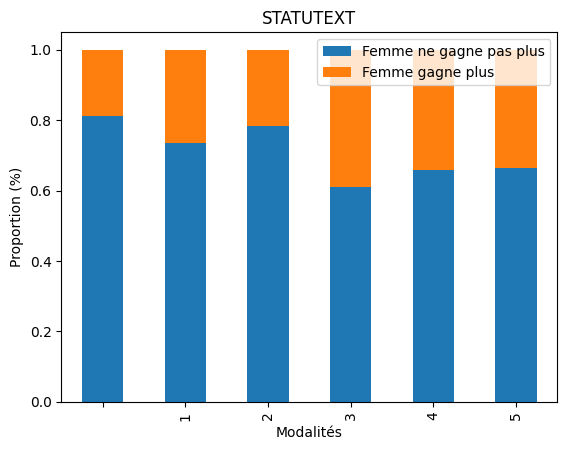

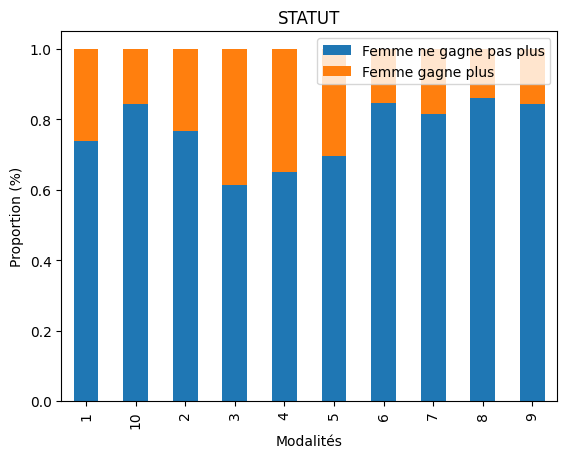

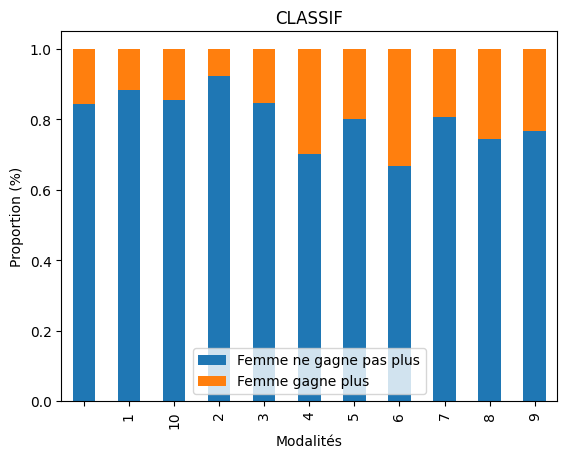

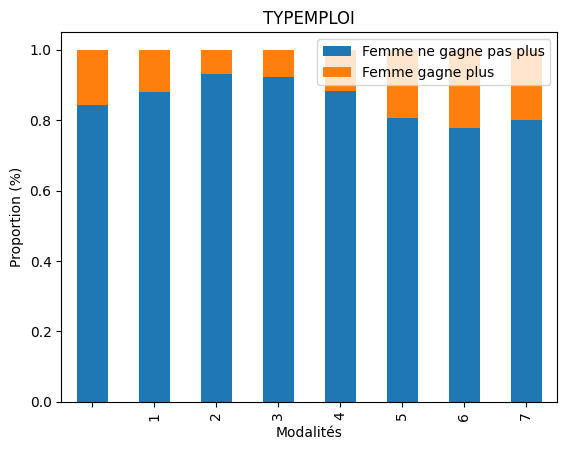

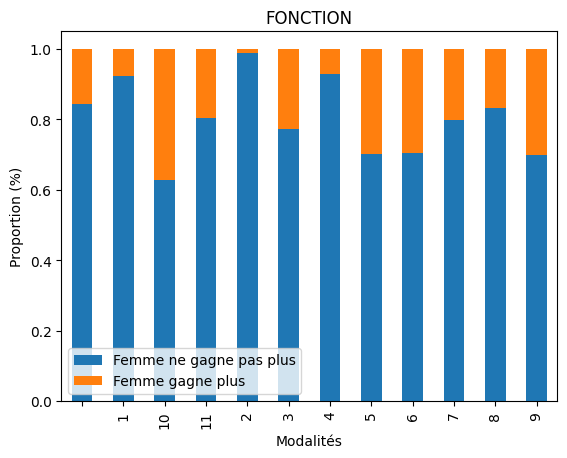

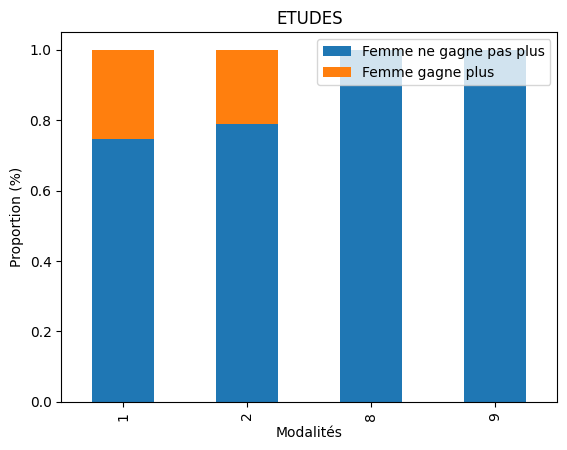

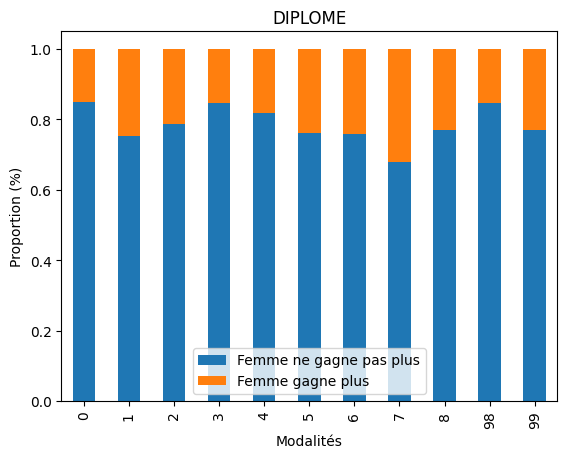

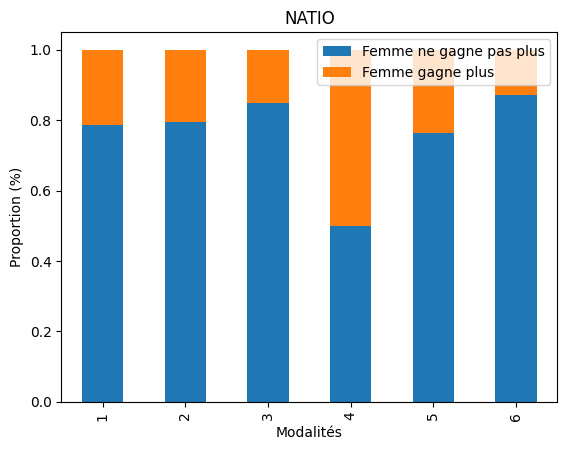

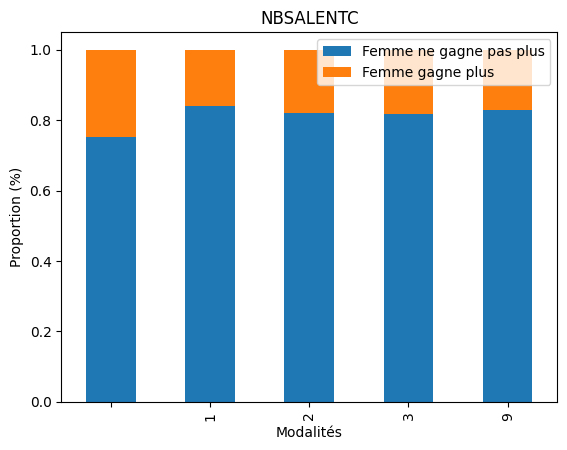

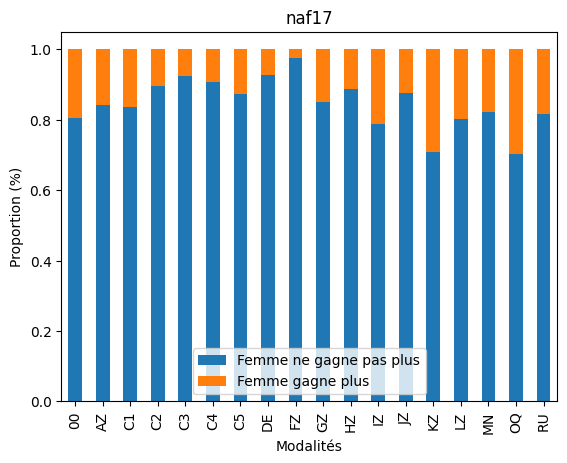

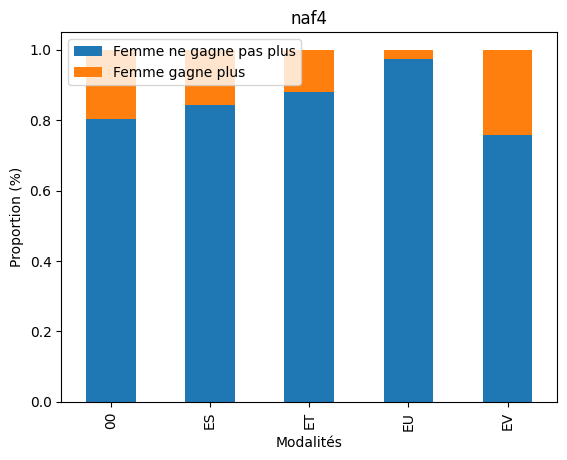

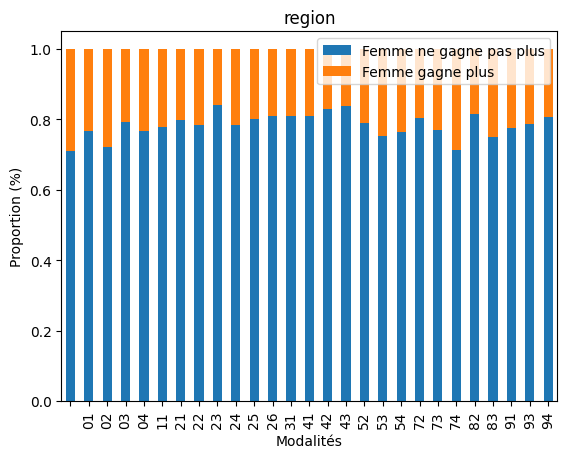

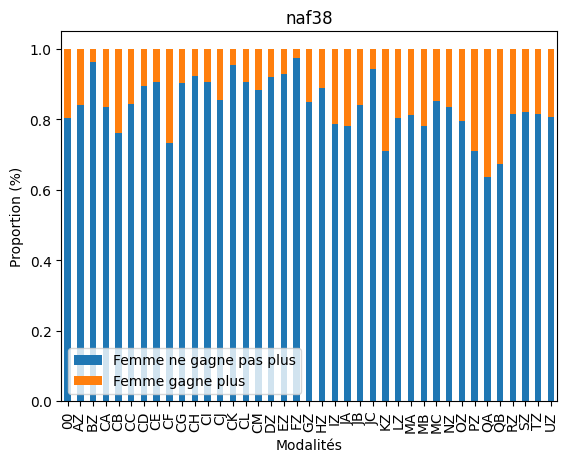

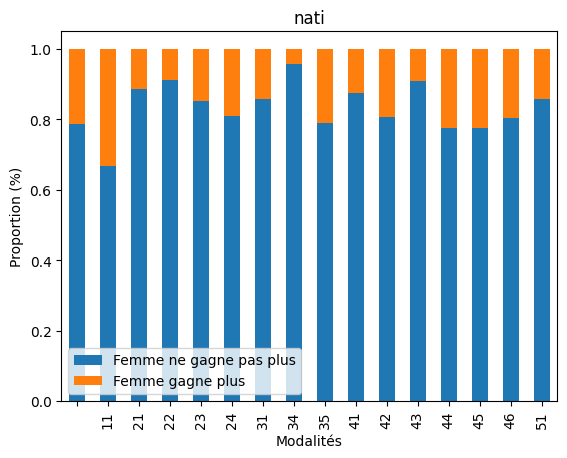

In [51]:
#var quali
for col in quali_cols:
    figsize = (20, 20)
    (selected_df.groupby([col, 'Y'])['Y'].count()/selected_df.groupby([col])[col].count()).unstack(level=1).plot(kind='bar', stacked=True)
    plt.title(col)
    plt.xlabel('Modalités')
    plt.ylabel('Proportion (%)')
    plt.legend(['Femme ne gagne pas plus', 'Femme gagne plus'])
    plt.show()

### Valeur manquante

In [52]:
#NA
selected_df.isnull().sum()

IDENT_MEN        0
IDENT_IND        0
NPERS            0
NACTIFS          0
TYPMEN5          0
REVMEN        1035
CJSITUA          0
CJACTOCCUP       4
SEXE             0
AGE              0
COUPLE           0
COUPLRP          0
CONJOINT         0
ETAMATRI         0
ENFANT           0
IPROPLOC         0
PRACT            0
LIENPREF         0
SITUA            0
RABS             0
NBENFM3          0
NBENF3A17        0
NBENF18P         0
ITOTREV          0
EREG             0
FRANCE           0
TPP              0
HH             440
ACTIP            0
STATUTP          0
ACTIM            0
STATUTM          0
ETUDIPL          0
STATUTEXT        0
STATUT           0
CLASSIF          0
TYPEMPLOI        0
FONCTION         0
ETUDES           0
DIPLOME          0
NATIO            0
AGFINETU       242
NBSALENTC        0
IDENT_LOG        0
pondcal          0
naf17            0
naf4             0
region           0
anciennete      39
naf38            0
nati             0
Y                0
dtype: int64

In [53]:
# Remplacer les NA dans la colonne REVMEN en fonction de la médiane des groupes de SITUA
selected_df['REVMEN'] = selected_df.groupby('SITUA')['REVMEN'].transform(lambda x: x.fillna(x.median()))

# Vérifier que les valeurs manquantes ont été remplacées
print(selected_df)

           IDENT_MEN        IDENT_IND  NPERS  NACTIFS TYPMEN5  REVMEN CJSITUA  \
2      0100084601000  010008460100002    5.0      2.0       4  2300.0       1   
3      0100091701000  010009170100001    2.0      1.0       3  3500.0       6   
5      0100097401000  010009740100002    4.0      2.0       4  1650.0       4   
6      0100098501000  010009850100001    2.0      2.0       3  2200.0       1   
7      0100098601000  010009860100001    4.0      1.0       4   673.0       6   
...              ...              ...    ...      ...     ...     ...     ...   
33667  9300012703000  930001270300001    2.0      2.0       3  2600.0       1   
33668  9300058901000  930005890100001    4.0      2.0       4  3500.0       1   
33669  9300076701000  930007670100001    2.0      2.0       3  3500.0       1   
33671  9400000601000  940000060100002    2.0      2.0       3  1900.0       1   
33672  9400008601000  940000860100002    6.0      1.0       4  2800.0       1   

       CJACTOCCUP SEXE   AG

In [54]:
##HH   
# Remplacer les NA dans la colonne REVMEN en fonction de la médiane des groupes de SITUA
selected_df['HH'] = selected_df.groupby('SITUA')['HH'].transform(lambda x: x.fillna(x.median()))

# Vérifier que les valeurs manquantes ont été remplacées
print(selected_df)

           IDENT_MEN        IDENT_IND  NPERS  NACTIFS TYPMEN5  REVMEN CJSITUA  \
2      0100084601000  010008460100002    5.0      2.0       4  2300.0       1   
3      0100091701000  010009170100001    2.0      1.0       3  3500.0       6   
5      0100097401000  010009740100002    4.0      2.0       4  1650.0       4   
6      0100098501000  010009850100001    2.0      2.0       3  2200.0       1   
7      0100098601000  010009860100001    4.0      1.0       4   673.0       6   
...              ...              ...    ...      ...     ...     ...     ...   
33667  9300012703000  930001270300001    2.0      2.0       3  2600.0       1   
33668  9300058901000  930005890100001    4.0      2.0       4  3500.0       1   
33669  9300076701000  930007670100001    2.0      2.0       3  3500.0       1   
33671  9400000601000  940000060100002    2.0      2.0       3  1900.0       1   
33672  9400008601000  940000860100002    6.0      1.0       4  2800.0       1   

       CJACTOCCUP SEXE   AG

In [55]:
##CJACTOCCUP
# Calculer le mode de la colonne "CJACTOCCUP"
mode_value = selected_df['CJACTOCCUP'].mode()[0]

# Remplacer les valeurs NA par le mode
selected_df['CJACTOCCUP'].fillna(mode_value, inplace=True)

C:\Users\ingemedia\AppData\Local\Temp\ipykernel_53172\2315726163.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_df['CJACTOCCUP'].fillna(mode_value, inplace=True)


In [56]:
##AGFINETU
# Fonction pour calculer la médiane arrondie
def median_rounded(x):
    return np.round(x.median())

# Remplacer les valeurs NA de AGFINETU par la médiane arrondie de AGFINETU en fonction de DIPLOME
selected_df['AGFINETU'] = selected_df.groupby('DIPLOME')['AGFINETU'].transform(lambda x: x.fillna(median_rounded(x)))


In [57]:
###anciennete 
# Fonction pour calculer la moyenne
def mean_value(x):
    return x.mean()

# Remplacer les valeurs NA de "anciennete" par la moyenne de "anciennete" en fonction de "AGE"
selected_df['anciennete'] = selected_df.groupby('AGE')['anciennete'].transform(lambda x: x.fillna(mean_value(x)))

In [58]:
#RABS
# ici, il y a des NA pour toutes les personnes en emploi, on remplace alors les NA par 0
selected_df['RABS'].fillna(0, inplace=True)


C:\Users\ingemedia\AppData\Local\Temp\ipykernel_53172\613569518.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_df['RABS'].fillna(0, inplace=True)


# Construction du modèle logistique

In [59]:
import sklearn
import imblearn

Colonnes présentes dans le DataFrame:
Index(['IDENT_MEN', 'IDENT_IND', 'NPERS', 'NACTIFS', 'TYPMEN5', 'REVMEN',
       'CJSITUA', 'CJACTOCCUP', 'SEXE', 'AGE', 'COUPLE', 'COUPLRP', 'CONJOINT',
       'ETAMATRI', 'ENFANT', 'IPROPLOC', 'PRACT', 'LIENPREF', 'SITUA', 'RABS',
       'NBENFM3', 'NBENF3A17', 'NBENF18P', 'ITOTREV', 'EREG', 'FRANCE', 'TPP',
       'HH', 'ACTIP', 'STATUTP', 'ACTIM', 'STATUTM', 'ETUDIPL', 'STATUTEXT',
       'STATUT', 'CLASSIF', 'TYPEMPLOI', 'FONCTION', 'ETUDES', 'DIPLOME',
       'NATIO', 'AGFINETU', 'NBSALENTC', 'IDENT_LOG', 'pondcal', 'naf17',
       'naf4', 'region', 'anciennete', 'naf38', 'nati', 'Y'],
      dtype='object')


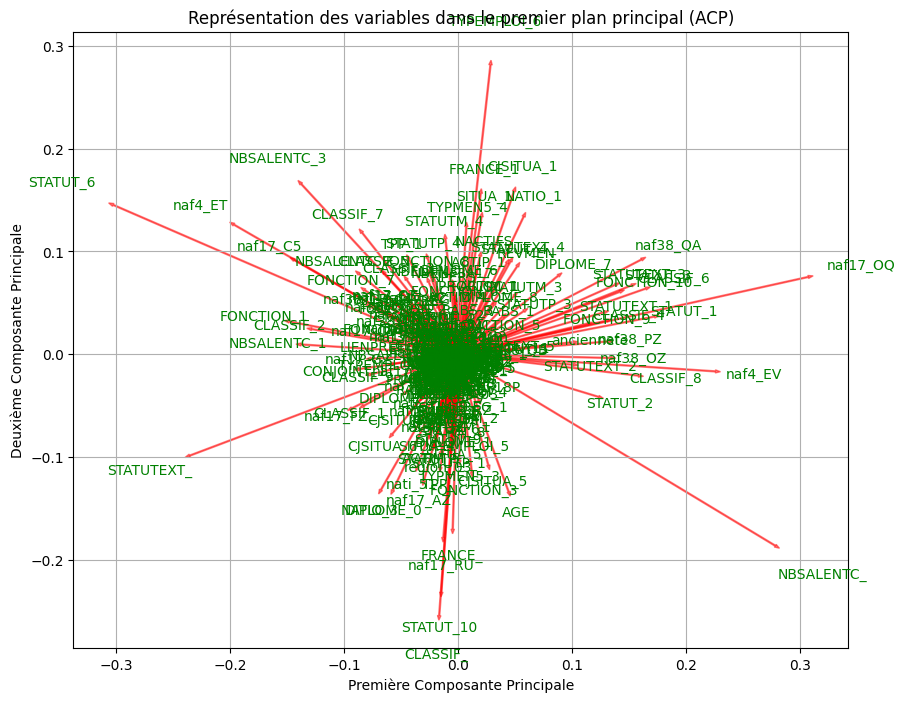

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Vérifiez les colonnes présentes dans selected_df
print("Colonnes présentes dans le DataFrame:")
print(selected_df.columns)

# Liste des colonnes catégorielles à encoder en one-hot
colonnes_categorical = ['TYPMEN5', 'CJSITUA', 'COUPLRP', 'CONJOINT',
                        'ETAMATRI', 'ENFANT', 'IPROPLOC', 'LIENPREF', 'SITUA',
                        'RABS', 'ITOTREV', 'EREG', 'FRANCE', 'TPP', 'ACTIP', 'STATUTP',
                        'ACTIM', 'STATUTM', 'ETUDIPL', 'STATUTEXT', 'STATUT', 'CLASSIF',
                        'TYPEMPLOI', 'FONCTION', 'ETUDES', 'DIPLOME', 'NATIO', 'NBSALENTC',
                        'naf17', 'naf4', 'region', 'naf38', 'nati']

# Sélectionner les variables explicatives et la variable d'intérêt
X = selected_df[['NPERS', 'NACTIFS', 'TYPMEN5', 'REVMEN',
                 'CJSITUA', 'CJACTOCCUP', 'AGE', 'COUPLRP', 'CONJOINT',
                 'ETAMATRI', 'ENFANT', 'IPROPLOC', 'LIENPREF', 'SITUA',
                 'RABS', 'NBENFM3', 'NBENF3A17', 'NBENF18P', 'ITOTREV', 'EREG',
                 'FRANCE', 'TPP', 'HH', 'ACTIP', 'STATUTP', 'ACTIM', 'STATUTM',
                 'ETUDIPL', 'STATUTEXT', 'STATUT', 'CLASSIF', 'TYPEMPLOI', 'FONCTION',
                 'ETUDES', 'DIPLOME', 'NATIO', 'AGFINETU', 'NBSALENTC', 'naf17', 'naf4', 'region', 'anciennete', 'naf38', 'nati']]

y = selected_df['Y']

# Convertir les colonnes non catégorielles en numérique
for col in X.columns:
    if col not in colonnes_categorical:
        X.loc[:, col] = pd.to_numeric(X[col], errors='coerce')

# Remplacer les valeurs manquantes par une valeur par défaut (par exemple, 0)
X = X.fillna(0)

# Appliquer l'encodage one-hot sur les colonnes catégorielles
column_transformer = ColumnTransformer(
    transformers=[
        ('qualitative', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), colonnes_categorical)
    ],
    remainder='passthrough'  # Conserver les autres colonnes
)

# Transformation des données
X_encoded = column_transformer.fit_transform(X)

# Obtenir les noms des colonnes après transformation
onehot_columns = column_transformer.named_transformers_['qualitative'].get_feature_names_out(input_features=colonnes_categorical)
passthrough_columns = [col for col in X.columns if col not in colonnes_categorical]
feature_names = list(onehot_columns) + passthrough_columns

# Convertir X_encoded en DataFrame avec les noms de colonnes d'origine
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)

# Filtrer les variables hautement corrélées
def filter_highly_correlated(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df.drop(columns=to_drop, errors='ignore')

X_filtered = filter_highly_correlated(X_encoded_df)

# Calculer la matrice de corrélation
corr_matrix = X_filtered.corr()

# Pour l'ACP, normalisez les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# ACP avec deux composantes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Création du graphique
plt.figure(figsize=(10, 8))

# Tracer chaque variable dans le premier plan principal
for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, pc1, pc2, color='r', alpha=0.5)
    plt.text(pc1 * 1.15, pc2 * 1.15, X_filtered.columns[i], color='g', ha='center', va='center')

# Tracer les individus (observations) dans le premier plan principal
plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.title('Représentation des variables dans le premier plan principal (ACP)')
plt.grid()

plt.show()

In [61]:
# Obtenir les composantes principales
components = pca.components_

# Identifier les variables importantes en utilisant PCA
importance_pc1 = np.abs(components[0])
importance_pc2 = np.abs(components[1])
combined_importance = importance_pc1 + importance_pc2
indices_most_important = np.argsort(combined_importance)[::-1]

# Sélectionner les variables les plus importantes (par exemple, les 20 premières)
num_features_to_select = 100
most_important_features_indices = indices_most_important[:num_features_to_select]
most_important_features = [feature_names[i] for i in most_important_features_indices]

print("Variables les plus importantes basées sur la PCA:")
print(most_important_features)


Variables les plus importantes basées sur la PCA:
['DIPLOME_1', 'STATUTEXT_2', 'naf17_00', 'STATUTM_1', 'naf17_C1', 'CLASSIF_4', 'DIPLOME_4', 'STATUTEXT_5', 'naf38_CA', 'ETUDIPL_1', 'naf17_C2', 'NATIO_2', 'STATUT_6', 'ETUDIPL_8', 'ETUDIPL_', 'CJSITUA_1', 'STATUTM_4', 'STATUT_7', 'CLASSIF_6', 'ETUDES_2', 'FONCTION_9', 'naf17_AZ', 'FONCTION_', 'CLASSIF_5', 'STATUT_8', 'naf38_LZ', 'RABS_9', 'RABS_8', 'STATUTM_2', 'DIPLOME_3', 'ETUDIPL_2', 'FONCTION_5', 'STATUT_4', 'LIENPREF_02', 'DIPLOME_7', 'STATUT_2', 'DIPLOME_2', 'NATIO_4', 'naf38_JA', 'TYPEMPLOI_3', 'naf38_BZ', 'TYPEMPLOI_5', 'STATUT_5', 'naf38_KZ', 'naf38_AZ', 'STATUTM_9', 'EREG_1', 'CJSITUA_6', 'CJSITUA_5', 'STATUT_1', 'TYPMEN5_4', 'STATUTEXT_', 'CLASSIF_9', 'EREG_', 'region_42', 'ACTIM_3', 'ACTIP_4', 'STATUT_3', 'naf38_JC', 'naf38_PZ', 'STATUTM_3', 'naf17_DE', 'TPP_9', 'STATUTP_2', 'DIPLOME_99', 'ACTIM_2', 'NATIO_1', 'TYPMEN5_3', 'NATIO_3', 'TYPEMPLOI_4', 'LIENPREF_31', 'COUPLRP_2', 'region_41', 'ACTIP_1', 'ACTIP_3', 'CJSITUA_4', '

### On a beaucoup de variables, on va donc filtrer selon certains critères

In [62]:
# Étape 1: Filtrer les variables à faible variance
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # Seuil de variance (ajustable)
X_variance_filtered = selector.fit_transform(X_filtered)

# Obtenir les noms des colonnes restantes après filtrage
columns_variance_filtered = [X_filtered.columns[i] for i in range(len(X_filtered.columns)) if selector.get_support()[i]]

# Étape 2: Sélection de caractéristiques basée sur la régression logistique
logreg = LogisticRegression(max_iter=5000)
selector_model = SelectFromModel(estimator=logreg).fit(X_variance_filtered, y)

X_model_selected = selector_model.transform(X_variance_filtered)

# Obtenir les noms des colonnes restantes après sélection par le modèle
columns_model_selected = [columns_variance_filtered[i] for i in range(len(columns_variance_filtered)) if selector_model.get_support()[i]]

# Afficher le nombre de variables avant et après filtrage
print(f"Nombre de variables après encodage One-Hot: {X_encoded_df.shape[1]}")
print(f"Nombre de variables après filtrage de variance: {X_variance_filtered.shape[1]}")
print(f"Nombre de variables après sélection par le modèle: {X_model_selected.shape[1]}")


Nombre de variables après encodage One-Hot: 302
Nombre de variables après filtrage de variance: 162
Nombre de variables après sélection par le modèle: 46


C:\Users\ingemedia\Desktop\ETUDES\DU Sorbonne\Cours Statistique\Projet\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Ajustement sur les variables restantes

In [63]:
# Optionnel : Standardisation des données pour PCA ou régression logistique
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_model_selected)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Entraîner un modèle de régression logistique en prenant en compte le déséquilibre des classes
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = logreg.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

X_scaled.shape

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      5668
           1       0.46      0.76      0.58      1540

    accuracy                           0.76      7208
   macro avg       0.69      0.76      0.71      7208
weighted avg       0.82      0.76      0.78      7208

Confusion Matrix:
[[4320 1348]
 [ 371 1169]]


(24024, 46)

In [64]:
# Obtenir les coefficients du modèle de régression logistique
coefficients = pd.DataFrame(logreg.coef_.T, columns=['Coefficient'])
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print("Importance des variables dans le modèle de régression logistique :")
print(coefficients)
coefficients.shape

Importance des variables dans le modèle de régression logistique :
    Coefficient  Abs_Coefficient
4      1.070744         1.070744
15    -0.716275         0.716275
1     -0.502236         0.502236
44    -0.441770         0.441770
42     0.398619         0.398619
31     0.376219         0.376219
27    -0.315204         0.315204
39    -0.281934         0.281934
32     0.259262         0.259262
18     0.256346         0.256346
14     0.235739         0.235739
45    -0.225749         0.225749
19     0.210140         0.210140
43    -0.191423         0.191423
25     0.178497         0.178497
13    -0.178009         0.178009
38    -0.171365         0.171365
24     0.153210         0.153210
12    -0.149762         0.149762
0      0.148552         0.148552
6     -0.141070         0.141070
5     -0.137325         0.137325
17    -0.129218         0.129218
3      0.125480         0.125480
22    -0.125002         0.125002
23     0.121272         0.121272
37    -0.101448         0.101448
29     0.

(46, 2)

## Comparons maintenant avec des méthodes itératives de selection de variables au sein du modèle

### Utilisation de la méthode Forward

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Fonction pour calculer les VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Entraîner un modèle de régression logistique en utilisant la pondération des classes
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)

# -----------------------------
# Forward Selection
# -----------------------------

# Sélection avant (Forward Selection)
sfs_forward = SFS(logreg,
                  k_features='best', 
                  forward=True, 
                  floating=False, 
                  scoring='accuracy',
                  cv=5)

sfs_forward = sfs_forward.fit(X_train, y_train)

# Caractéristiques sélectionnées par la forward selection
selected_features_forward = list(sfs_forward.k_feature_names_)
print("Caractéristiques sélectionnées (Forward Selection) :")
print(selected_features_forward)

# Entraîner le modèle avec les caractéristiques sélectionnées par la forward selection
X_train_forward_selected = sfs_forward.transform(X_train)
logreg.fit(X_train_forward_selected, y_train)

# Prédire sur l'ensemble de test
X_test_forward_selected = sfs_forward.transform(X_test)
y_pred_forward = logreg.predict(X_test_forward_selected)

# Évaluer le modèle
accuracy_forward = accuracy_score(y_test, y_pred_forward)
print(f'Accuracy (Forward Selection): {accuracy_forward:.2f}')

print('Classification Report (Forward Selection):')
print(classification_report(y_test, y_pred_forward))

print('Confusion Matrix (Forward Selection):')
print(confusion_matrix(y_test, y_pred_forward))

# Calculer les VIF pour les caractéristiques sélectionnées par la forward selection
X_train_forward_selected_df = pd.DataFrame(X_train_forward_selected, columns=selected_features_forward)
X_train_forward_selected_with_const = sm.add_constant(X_train_forward_selected_df)

# Réinitialiser les indices pour l'alignement
y_train_reset = y_train.reset_index(drop=True)
X_train_forward_selected_with_const_reset = X_train_forward_selected_with_const.reset_index(drop=True)

vif_forward = calculate_vif(X_train_forward_selected_with_const_reset.drop(columns=['const']))

print("Variance Inflation Factor (Forward Selection):")
print(vif_forward)

# Calculer AIC et BIC pour le modèle forward
logit_model_forward = sm.Logit(y_train_reset, X_train_forward_selected_with_const_reset).fit()
print(f"AIC (Forward Selection): {logit_model_forward.aic}")
print(f"BIC (Forward Selection): {logit_model_forward.bic}")

C:\Users\ingemedia\Desktop\ETUDES\DU Sorbonne\Cours Statistique\Projet\env\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\ingemedia\Desktop\ETUDES\DU Sorbonne\Cours Statistique\Projet\env\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\ingemedia\Desktop\ETUDES\DU Sorbonne\Cours Statistique\Projet\env\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\ingemedia\Desktop\ETUDES\DU Sorbonne\Cours Statistique\Projet\env\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be rem

In [ ]:
selected_feature_names_forward = [columns_model_selected[int(i)] for i in selected_features_forward]
print("Noms des caractéristiques sélectionnées (Forward Selection) :")
print(selected_feature_names_forward)

Caractéristiques Sélectionnées (Forward Selection)
Les caractéristiques sélectionnées sont les suivantes :

Feature '4'
Feature '43'
Cela signifie que le modèle construit après la sélection par Forward Selection utilise uniquement ces deux caractéristiques pour faire des prédictions.

Performance du Modèle
Accuracy (Précision) : L'accuracy du modèle est de 0.78, ce qui signifie que le modèle prédit correctement la classe de 78% des exemples dans l'ensemble de test.

Classification Report :

Precision (Précision) : Pour la classe '0', la précision est de 0.79, ce qui indique que parmi toutes les prédictions faites pour la classe '0', 79% sont correctes. Pour la classe '1', la précision est beaucoup plus faible à 0.42, ce qui signifie que seulement 42% des prédictions faites pour la classe '1' sont correctes.

Recall (Rappel) : Pour la classe '0', le rappel est élevé à 0.99, ce qui signifie que le modèle identifie correctement 99% des véritables exemples de la classe '0'. En revanche, le rappel pour la classe '1' est très bas à 0.02, indiquant que le modèle manque la plupart des exemples réels de la classe '1'.

F1-score : Le F1-score combine à la fois la précision et le rappel en une seule métrique. Pour la classe '0', le F1-score est élevé à 0.88, ce qui est bon. Pour la classe '1', le F1-score est très bas à 0.04, indiquant une performance très faible pour la classe minoritaire.

Confusion Matrix (Matrice de Confusion) :

La matrice de confusion montre que le modèle prédit correctement la plupart des exemples de la classe majoritaire '0' (5623 vrais positifs), mais il a du mal à prédire correctement les exemples de la classe minoritaire '1' (32 vrais positifs seulement).
Variance Inflation Factor (VIF)
Les valeurs de VIF pour les caractéristiques sélectionnées ('4' et '43') sont très proches de 1. Cela indique qu'il n'y a pas de problème de multicollinéarité significatif entre ces deux caractéristiques.
AIC et BIC
AIC (Critère d'Information d'Akaike) : L'AIC est une mesure de la qualité du modèle. Plus l'AIC est bas, meilleure est la qualité du modèle. Dans ce cas, l'AIC est élevé à 17222.87, indiquant que le modèle n'est peut-être pas le plus optimal en termes de qualité.

BIC (Critère d'Information Bayésien) : Le BIC est une autre mesure de la qualité du modèle, prenant également en compte la complexité du modèle. Comme l'AIC, un BIC plus bas est préférable. Ici, le BIC est de 17246.06, ce qui est assez élevé.

Interprétation Globale
La sélection par Forward Selection a conduit à un modèle qui présente une bonne précision pour la classe majoritaire mais de très mauvaises performances pour la classe minoritaire. Cela suggère un déséquilibre significatif dans la prédiction des deux classes. De plus, les valeurs d'AIC et de BIC indiquent que le modèle pourrait ne pas être optimal en termes de qualité et de complexité.

En conclusion, bien que la sélection de caractéristiques par Forward Selection ait réduit le nombre de variables, le modèle résultant n'est pas optimal en raison de performances médiocres pour la classe minoritaire et d'indicateurs AIC/BIC relativement élevés. Une exploration plus approfondie des données et une réévaluation de la stratégie de sélection de caractéristiques pourraient être nécessaires pour améliorer la performance globale du modèle.

### Utilisation de la méthode Backward

In [ ]:
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Entraîner un modèle de régression logistique en utilisant la pondération des classes
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)

# -----------------------------
# Backward Selection
# -----------------------------

# Sélection arrière (Backward Selection)
sfs_backward = SFS(logreg,
                   k_features='best', 
                   forward=False, 
                   floating=False, 
                   scoring='accuracy',
                   cv=5)

sfs_backward = sfs_backward.fit(X_train, y_train)

# Caractéristiques sélectionnées par la backward selection
selected_features_backward = list(sfs_backward.k_feature_names_)
print("Indices des caractéristiques sélectionnées (Backward Selection) :")
print(selected_features_backward)

# Mapper les indices sélectionnés aux noms de colonnes
selected_feature_names_backward = [columns_model_selected[int(i)] for i in selected_features_backward]
print("Noms des caractéristiques sélectionnées (Backward Selection) :")
print(selected_feature_names_backward)

# Entraîner le modèle avec les caractéristiques sélectionnées par la backward selection
X_train_backward_selected = sfs_backward.transform(X_train)
logreg.fit(X_train_backward_selected, y_train)

# Prédire sur l'ensemble de test
X_test_backward_selected = sfs_backward.transform(X_test)
y_pred_backward = logreg.predict(X_test_backward_selected)

# Évaluer le modèle
accuracy_backward = accuracy_score(y_test, y_pred_backward)
print(f'Accuracy (Backward Selection): {accuracy_backward:.2f}')

print('Classification Report (Backward Selection):')
print(classification_report(y_test, y_pred_backward))

print('Confusion Matrix (Backward Selection):')
print(confusion_matrix(y_test, y_pred_backward))

# Calculer les VIF pour les caractéristiques sélectionnées par la backward selection
X_train_backward_selected_df = pd.DataFrame(X_train_backward_selected, columns=selected_feature_names_backward)
X_train_backward_selected_with_const = sm.add_constant(X_train_backward_selected_df)

# Réinitialiser les indices pour l'alignement
y_train_reset = y_train.reset_index(drop=True)
X_train_backward_selected_with_const_reset = X_train_backward_selected_with_const.reset_index(drop=True)

vif_backward = calculate_vif(X_train_backward_selected_with_const_reset.drop(columns=['const']))

print("Variance Inflation Factor (Backward Selection):")
print(vif_backward)

# Calculer AIC et BIC pour le modèle backward
logit_model_backward = sm.Logit(y_train_reset, X_train_backward_selected_with_const_reset).fit()
print(f"AIC (Backward Selection): {logit_model_backward.aic}")
print(f"BIC (Backward Selection): {logit_model_backward.bic}")

Analyse des Résultats de la Sélection Backward
Caractéristiques Sélectionnées
Indices des caractéristiques sélectionnées :

['3', '7', '19', '20', '21', '22', '23', '24', '25', '32', '34', '39', '43']
Noms des caractéristiques sélectionnées :

CJSITUA_6
LIENPREF_00
FONCTION_1
FONCTION_10
FONCTION_2
FONCTION_3
FONCTION_4
FONCTION_5
FONCTION_6
naf17_C5
naf17_HZ
naf4_EV
naf38_JC
Ces caractéristiques représentent une combinaison de variables liées à la situation professionnelle (CJSITUA), la relation préférée (LIENPREF), la fonction (FONCTION), et des codes de classification économique (naf17, naf4, naf38).

Performance du Modèle
Accuracy: 0.79

L'exactitude du modèle est de 79%, ce qui indique que le modèle prédit correctement 79% des cas sur l'ensemble de test.
Rapport de Classification:

Classe 0 (majoritaire):
Précision: 0.92
Rappel: 0.80
F1-score: 0.85
Classe 1 (minoritaire):
Précision: 0.50
Rappel: 0.74
F1-score: 0.60
L'analyse des classes montre une forte performance pour la classe majoritaire (0) et une performance plus modérée pour la classe minoritaire (1). Le rappel de 0.74 pour la classe 1 est particulièrement notable, indiquant que le modèle détecte bien la classe minoritaire, mais avec une précision plus faible.

Matrice de Confusion:

Classe 0:
Prédits corrects: 4536
Faux positifs: 1132
Classe 1:
Prédits corrects: 1133
Faux négatifs: 407
La matrice de confusion montre que la plupart des erreurs de prédiction pour la classe 0 sont des faux positifs, tandis que pour la classe 1, ce sont des faux négatifs.

Multicolinéarité
Variance Inflation Factor (VIF):

Tous les VIF sont inférieurs à 2, ce qui suggère une faible multicolinéarité entre les caractéristiques sélectionnées. Cela est souhaitable car cela signifie que les caractéristiques sélectionnées sont relativement indépendantes les unes des autres.
Critères d'Information
AIC (Akaike Information Criterion): 13409.084
BIC (Bayesian Information Criterion): 13517.305
Ces valeurs sont des mesures de la qualité du modèle, prenant en compte la complexité du modèle (nombre de caractéristiques). Des valeurs plus faibles indiquent un meilleur équilibre entre l'ajustement du modèle et sa complexité.

Conclusion
La sélection backward a permis d'identifier un ensemble restreint de 13 caractéristiques importantes pour la prédiction. Le modèle résultant montre une bonne performance globale avec une accuracy de 79%, et un bon rappel pour la classe minoritaire. La faible multicolinéarité entre les caractéristiques sélectionnées suggère que ces caractéristiques apportent des informations uniques au modèle.

Pour améliorer davantage les performances, surtout pour la classe minoritaire, il pourrait être utile d'explorer des techniques supplémentaires telles que le suréchantillonnage de la classe minoritaire, l'utilisation de modèles plus complexes, ou l'ajustement des seuils de décision.

## Il y a un déséquilibre des classes REPRENONS LES TESTS en ajustant les classes

### En effet, on constate dans les résultats du modèle, qu'il arrive à très bien prédire le 0, mais il a du mal à prédire le 1
#### On va réajuster notre jeu de données en sous échantillonant les données avec un Y==0. Cela ajustera donc le nombre de ligne entre les Y==1 et Y==0 au nombre de ligne de Y==0

In [ ]:
from sklearn.utils import resample
import pandas as pd
import matplotlib.pyplot as plt

# X et y sont définis comme suit
X = selected_df.drop(columns=['Y'])  # Features
y = selected_df['Y']  # Variable cible (0 ou 1)

# Réinitialiser les index de X et y
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Séparer les exemples de chaque classe en utilisant iloc pour l'indexation
X_class_0 = X.loc[y == 0]
X_class_1 = X.loc[y == 1]
print(f"Dimension des lignes qui ont pour Y==0 {X_class_0.shape}")
print(f"Dimension des lignes qui ont pour Y==1 {X_class_1.shape}")

# Sous-échantillonnage de la classe majoritaire (classe '0') sans remplacement -> DESEQUILIBRE DE CLASSE
X_class_0_resampled = resample(X_class_0, replace=False, n_samples=len(X_class_1), random_state=42)

# Concaténer à nouveau les données équilibrées en utilisant les index
X_resampled = pd.concat([X_class_0_resampled, X_class_1], ignore_index=True)
y_resampled = pd.concat([y.iloc[X_class_0_resampled.index], y[y == 1]], ignore_index=True)

balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

# Affichage des nouvelles dimensions des données équilibrées après sous-échantillonnage
print("Dimensions des données équilibrées après sous-échantillonnage :")
print(X_resampled.shape, y_resampled.shape)

# Compter le nombre de 0 et de 1 dans y_resampled
counts = y_resampled.value_counts()

# Afficher les nombres dans un tableau
print("Tableau des valeurs rééchantillonnées :")
print(counts)

# histogramme
plt.figure(figsize=(6, 4))
plt.bar(counts.index, counts.values)
plt.xlabel('Classe')
plt.ylabel('Nombre')
plt.title('Répartition des classes après rééchantillonnage')
plt.xticks(counts.index, ['0', '1'])
plt.show()

### On effectue une PCA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

# Liste des variables catégorielles
colonnes_categorical = ['TYPMEN5', 'CJSITUA', 'COUPLRP', 'CONJOINT',
                        'ETAMATRI', 'ENFANT', 'IPROPLOC', 'LIENPREF', 'SITUA',
                        'RABS', 'ITOTREV', 'EREG', 'FRANCE', 'TPP', 'ACTIP', 'STATUTP',
                        'ACTIM', 'STATUTM', 'ETUDIPL', 'STATUTEXT', 'STATUT', 'CLASSIF',
                        'TYPEMPLOI', 'FONCTION', 'ETUDES', 'DIPLOME', 'NATIO', 'NBSALENTC',
                        'naf17', 'naf4', 'region', 'naf38', 'nati']

# Liste des variables sélectionnées
X = balanced_df[['NPERS', 'NACTIFS', 'TYPMEN5', 'REVMEN',
                 'CJSITUA', 'CJACTOCCUP', 'AGE', 'COUPLRP', 'CONJOINT',
                 'ETAMATRI', 'ENFANT', 'IPROPLOC', 'LIENPREF', 'SITUA',
                 'RABS', 'NBENFM3', 'NBENF3A17', 'NBENF18P', 'ITOTREV', 'EREG',
                 'FRANCE', 'TPP', 'HH', 'ACTIP', 'STATUTP', 'ACTIM', 'STATUTM',
                 'ETUDIPL', 'STATUTEXT', 'STATUT', 'CLASSIF', 'TYPEMPLOI', 'FONCTION',
                 'ETUDES', 'DIPLOME', 'NATIO', 'AGFINETU', 'NBSALENTC', 'naf17', 'naf4', 'region', 'anciennete', 'naf38', 'nati']]

y = balanced_df['Y']

# Conversion des variables en numérique (on s'assure qu'elles le soient)
for col in X.columns:
    if col not in colonnes_categorical:
        X.loc[:, col] = pd.to_numeric(X[col], errors='coerce')

#On remplace les valeurs manquantes par des 0
X = X.fillna(0)

# Encodage des variables qualitatives
column_transformer = ColumnTransformer(
    transformers=[
        ('qualitative', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), colonnes_categorical)
    ],
    remainder='passthrough'  # Keep other columns
)

# Transform the data
X_encoded = column_transformer.fit_transform(X)

# Get column names after transformation
onehot_columns = column_transformer.named_transformers_['qualitative'].get_feature_names_out(input_features=colonnes_categorical)
passthrough_columns = [col for col in X.columns if col not in colonnes_categorical]
feature_names = list(onehot_columns) + passthrough_columns

# Convert X_encoded to a DataFrame with original column names
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)

# Filtrer les variables hautement corrélées
def filter_highly_correlated(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df.drop(columns=to_drop, errors='ignore')

X_filtered = filter_highly_correlated(X_encoded_df)

# Perform standard scaling for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# PCA with two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the graph
plt.figure(figsize=(10, 8))

# Plot each variable in the first principal plane
for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, pc1, pc2, color='r', alpha=0.5)
    plt.text(pc1 * 1.15, pc2 * 1.15, X_filtered.columns[i], color='g', ha='center', va='center')

# Tracer les individus (observations) dans le premier plan principal
plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.title('Représentation des variables dans le premier plan principal (ACP)')
plt.grid()

plt.show()

### Sélection des variables selon différentes méthodes

In [ ]:
# Étape 1: Filtrer les variables à faible variance
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # Seuil de variance (ajustable)
X_variance_filtered = selector.fit_transform(X_filtered)

# Obtenir les noms des colonnes restantes après filtrage
columns_variance_filtered = [X_filtered.columns[i] for i in range(len(X_filtered.columns)) if selector.get_support()[i]]

# Étape 2: Sélection de caractéristiques basée sur la régression logistique
logreg = LogisticRegression(max_iter=5000)
threshold = 0.1
selector_model = SelectFromModel(estimator=logreg).fit(X_variance_filtered, y)

X_model_selected = selector_model.transform(X_variance_filtered)

# Obtenir les noms des colonnes restantes après sélection par le modèle
columns_model_selected = [columns_variance_filtered[i] for i in range(len(columns_variance_filtered)) if selector_model.get_support()[i]]

# Afficher le nombre de variables avant et après filtrage
print(f"Nombre de variables après encodage One-Hot: {X_encoded_df.shape[1]}")
print(f"Nombre de variables après filtrage de variance: {X_variance_filtered.shape[1]}")
print(f"Nombre de variables après sélection par le modèle: {X_model_selected.shape[1]}")

### Modèle avec les variables sélectionnées

In [ ]:
# Optionnel : Standardisation des données pour PCA ou régression logistique
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_model_selected)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Entraîner un modèle de régression logistique en prenant en compte le déséquilibre des classes
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = logreg.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

X_scaled.shape

## On essaye la méthode Forward sur nos variables

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Fonction pour calculer les VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Entraîner un modèle de régression logistique en utilisant la pondération des classes
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)

# -----------------------------
# Forward Selection
# -----------------------------

# Sélection avant (Forward Selection)
sfs_forward = SFS(logreg,
                  k_features='best', 
                  forward=True, 
                  floating=False, 
                  scoring='accuracy',
                  cv=5)

sfs_forward = sfs_forward.fit(X_train, y_train)

# Caractéristiques sélectionnées par la forward selection
selected_features_forward = list(sfs_forward.k_feature_names_)
print("Caractéristiques sélectionnées (Forward Selection) :")
print(selected_features_forward)

# Entraîner le modèle avec les caractéristiques sélectionnées par la forward selection
X_train_forward_selected = sfs_forward.transform(X_train)
logreg.fit(X_train_forward_selected, y_train)

# Prédire sur l'ensemble de test
X_test_forward_selected = sfs_forward.transform(X_test)
y_pred_forward = logreg.predict(X_test_forward_selected)

# Évaluer le modèle
accuracy_forward = accuracy_score(y_test, y_pred_forward)
print(f'Accuracy (Forward Selection): {accuracy_forward:.2f}')

print('Classification Report (Forward Selection):')
print(classification_report(y_test, y_pred_forward))

print('Confusion Matrix (Forward Selection):')
print(confusion_matrix(y_test, y_pred_forward))

# Calculer les VIF pour les caractéristiques sélectionnées par la forward selection
X_train_forward_selected_df = pd.DataFrame(X_train_forward_selected, columns=selected_features_forward)
X_train_forward_selected_with_const = sm.add_constant(X_train_forward_selected_df)

# Réinitialiser les indices pour l'alignement
y_train_reset = y_train.reset_index(drop=True)
X_train_forward_selected_with_const_reset = X_train_forward_selected_with_const.reset_index(drop=True)

try:
    vif_forward = calculate_vif(X_train_forward_selected_with_const_reset.drop(columns=['const']))
    print("Variance Inflation Factor (Forward Selection):")
    print(vif_forward)
except ValueError as e:
    print(f"Error calculating VIF: {e}")

# Calculer AIC et BIC pour le modèle forward
logit_model_forward = sm.Logit(y_train_reset, X_train_forward_selected_with_const_reset).fit()
print(f"AIC (Forward Selection): {logit_model_forward.aic}")
print(f"BIC (Forward Selection): {logit_model_forward.bic}")

In [ ]:
selected_feature_names_forward = [columns_model_selected[int(i)] for i in selected_features_forward]
print("Noms des caractéristiques sélectionnées (Forward Selection) :")
print(selected_feature_names_forward)

# Obtenir les coefficients du modèle
coefficients = logreg.coef_[0]

# Créer un DataFrame pour les coefficients et les noms de caractéristiques
coef_df = pd.DataFrame({'Feature': selected_feature_names_forward, 'Coefficient': coefficients})

# Calculer les odds ratios
coef_df['Odds_Ratio'] = np.exp(coef_df['Coefficient'])

# Trier les coefficients par valeur absolue dans l'ordre décroissant
coef_df_sorted = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Afficher les noms des caractéristiques sélectionnées, leurs coefficients et les odds ratios dans l'ordre décroissant des coefficients
print("\nNoms des caractéristiques sélectionnées, leurs coefficients et leurs odds ratios :")
for idx, row in coef_df_sorted.iterrows():
    print(f"{row['Feature']} : Coefficient = {row['Coefficient']:.4f}, Odds Ratio = {row['Odds_Ratio']:.4f}")

In [ ]:
from sklearn.metrics import roc_curve, auc
# Obtenir les probabilités prédites pour la classe positive (Y==1)
y_prob_forward = logreg.predict_proba(X_test_forward_selected)[:, 1]

# Calculer le taux de faux positifs (FPR), le taux de vrais positifs (TPR) et les seuils
fpr_forward, tpr_forward, thresholds_forward = roc_curve(y_test, y_prob_forward)

# Calculer l'aire sous la courbe ROC (AUC)
roc_auc_forward = auc(fpr_forward, tpr_forward)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_forward, tpr_forward, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_forward:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC (Forward Selection)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Essayons la méthode Backward

In [ ]:
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Entraîner un modèle de régression logistique en utilisant la pondération des classes
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)

# -----------------------------
# Backward Selection
# -----------------------------

# Sélection arrière (Backward Selection)
sfs_backward = SFS(logreg,
                   k_features='best', 
                   forward=False, 
                   floating=False, 
                   scoring='accuracy',
                   cv=5)

sfs_backward = sfs_backward.fit(X_train, y_train)

# Caractéristiques sélectionnées par la backward selection
selected_features_backward = list(sfs_backward.k_feature_names_)
print("Indices des caractéristiques sélectionnées (Backward Selection) :")
print(selected_features_backward)

# Mapper les indices sélectionnés aux noms de colonnes
selected_feature_names_backward = [columns_model_selected[int(i)] for i in selected_features_backward]
print("Noms des caractéristiques sélectionnées (Backward Selection) :")
print(selected_feature_names_backward)

# Entraîner le modèle avec les caractéristiques sélectionnées par la backward selection
X_train_backward_selected = sfs_backward.transform(X_train)
logreg.fit(X_train_backward_selected, y_train)

# Prédire sur l'ensemble de test
X_test_backward_selected = sfs_backward.transform(X_test)
y_pred_backward = logreg.predict(X_test_backward_selected)

# Évaluer le modèle
accuracy_backward = accuracy_score(y_test, y_pred_backward)
print(f'Accuracy (Backward Selection): {accuracy_backward:.2f}')

print('Classification Report (Backward Selection):')
print(classification_report(y_test, y_pred_backward))

print('Confusion Matrix (Backward Selection):')
print(confusion_matrix(y_test, y_pred_backward))

# Calculer les VIF pour les caractéristiques sélectionnées par la backward selection
X_train_backward_selected_df = pd.DataFrame(X_train_backward_selected, columns=selected_feature_names_backward)
X_train_backward_selected_with_const = sm.add_constant(X_train_backward_selected_df)

# Réinitialiser les indices pour l'alignement
y_train_reset = y_train.reset_index(drop=True)
X_train_backward_selected_with_const_reset = X_train_backward_selected_with_const.reset_index(drop=True)

vif_backward = calculate_vif(X_train_backward_selected_with_const_reset.drop(columns=['const']))

print("Variance Inflation Factor (Backward Selection):")
print(vif_backward)

# Calculer AIC et BIC pour le modèle backward
logit_model_backward = sm.Logit(y_train_reset, X_train_backward_selected_with_const_reset).fit()
print(f"AIC (Backward Selection): {logit_model_backward.aic}")
print(f"BIC (Backward Selection): {logit_model_backward.bic}")

In [ ]:
# Obtenir les coefficients du modèle
coefficients = logreg.coef_[0]

# Créer un DataFrame pour les coefficients et les noms de caractéristiques
coef_df = pd.DataFrame({'Feature': selected_feature_names_backward, 'Coefficient': coefficients})

# Calculer les odds ratios
coef_df['Odds_Ratio'] = np.exp(coef_df['Coefficient'])

# Trier les coefficients par valeur absolue dans l'ordre décroissant
coef_df_sorted = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Afficher les noms des caractéristiques sélectionnées, leurs coefficients et les odds ratios dans l'ordre décroissant des coefficients
print("\nNoms des caractéristiques sélectionnées, leurs coefficients et leurs odds ratios :")
for idx, row in coef_df_sorted.iterrows():
    print(f"{row['Feature']} : Coefficient = {row['Coefficient']:.4f}, Odds Ratio = {row['Odds_Ratio']:.4f}")

In [ ]:
# Courbe ROC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
y_prob_backward = logreg.predict_proba(X_test_backward_selected)[:, 1]
fpr_backward, tpr_backward, thresholds = roc_curve(y_test, y_prob_backward)
roc_auc_backward = roc_auc_score(y_test, y_prob_backward)

plt.figure(figsize=(8, 6))
plt.plot(fpr_backward, tpr_backward, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_backward:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC (Backward Selection)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()